In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import pickle as pkl
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
from scipy import stats

# set the  fontsize and some other elements
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Print Version
print(mpl.__version__)  
print(sns.__version__)

3.4.3
0.13.2


In [2]:
import proplot as pplt
import scienceplots

/Users/liuyong/miniconda3/lib/python3.9/site-packages/proplot/config.py:396: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipython.magic('config InlineBackend.figure_formats = ' + repr(fmt))
/Users/liuyong/miniconda3/lib/python3.9/site-packages/matplotlib_inline/config.py:59: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):
/Users/liuyong/miniconda3/lib/python3.9/site-packages/proplot/colors.py:810: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/liuyong/miniconda3/lib/python3.9/site-packages/proplot/cmaps/fes.txt' mode='r' encoding='UTF-8'>
  data = [
/Users/liuyong/miniconda3/lib/python3.9/site-packages/proplot/colors.py:810: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/liuyong/miniconda3/lib/python3.9/site-packages/proplot/cmaps/lap

In [3]:
from collections import *

# 散点图/分布图

<Figure size 800x640 with 0 Axes>

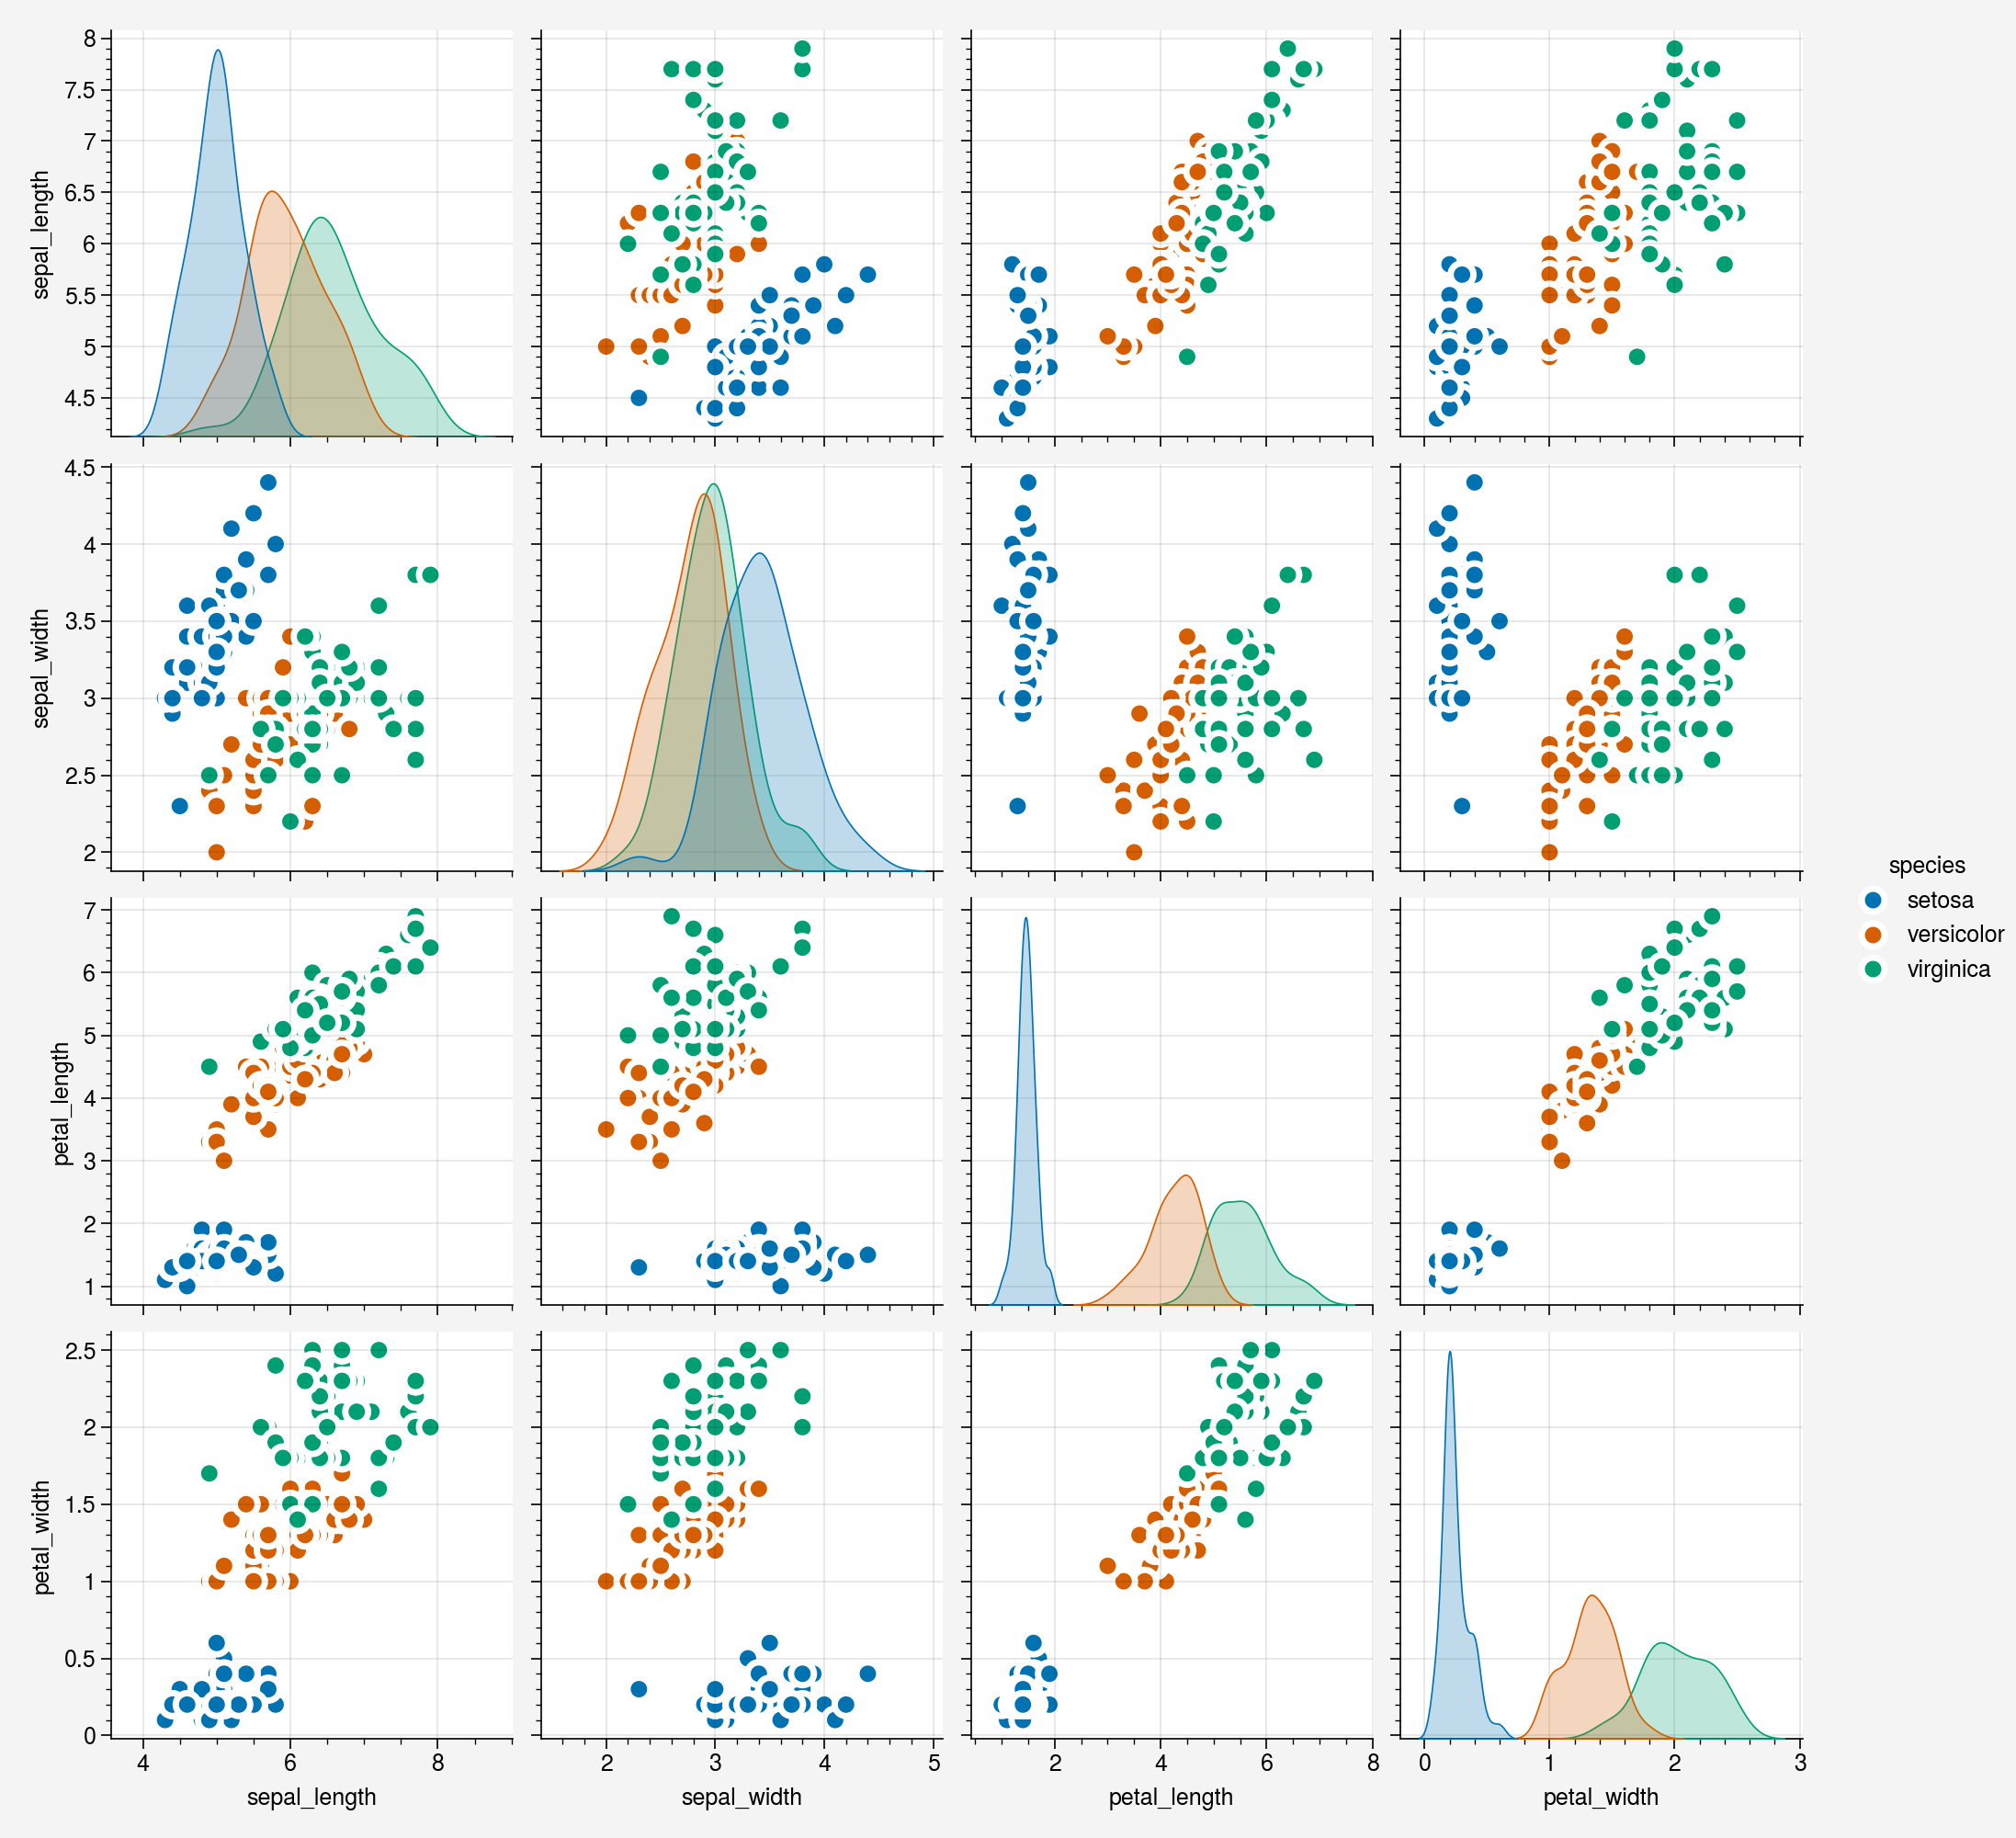

In [5]:
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [8]:
data

column,1,2,3,4,5
row idx,,,,,
a,3.324630,2.579592,1.598390,0.797487,0.696534
b,7.039063,5.300875,3.530395,2.324045,1.333688
c,9.558775,7.113611,4.555462,3.165112,1.437322
d,13.525940,10.215066,7.016972,4.942013,2.350347
e,16.467893,13.148835,8.979699,5.989404,2.880083


# 堆叠柱状图

/Users/liuyong/miniconda3/lib/python3.9/site-packages/proplot/config.py:396: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  ipython.magic('config InlineBackend.figure_formats = ' + repr(fmt))


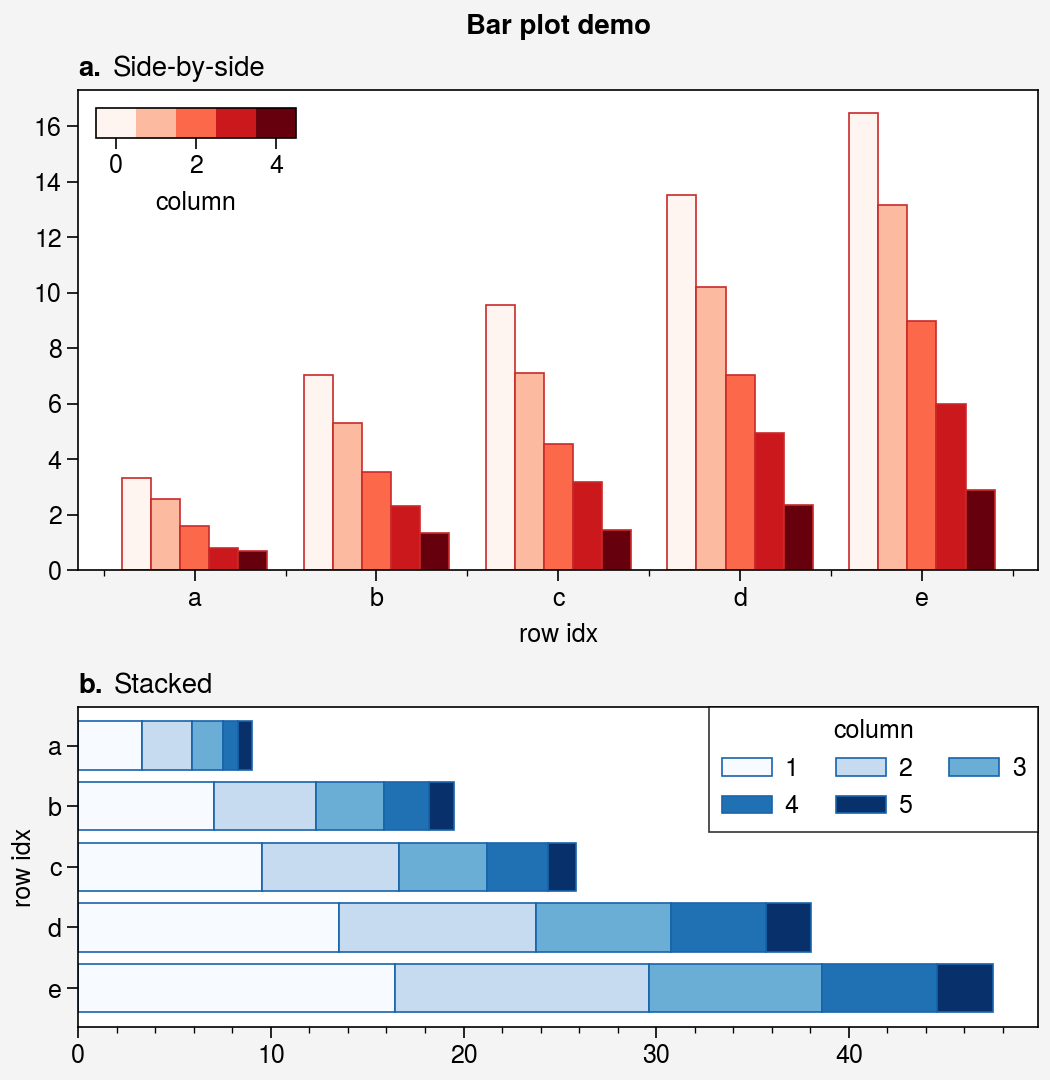

In [9]:
# Sample data
state = np.random.RandomState(51423)
data = state.rand(5, 5).cumsum(axis=0).cumsum(axis=1)[:, ::-1]
data = pd.DataFrame(
    data, columns=pd.Index(np.arange(1, 6), name='column'),
    index=pd.Index(['a', 'b', 'c', 'd', 'e'], name='row idx')
)

# Figure
pplt.rc.abc = 'a.'
pplt.rc.titleloc = 'l'
gs = pplt.GridSpec(nrows=2, hratios=(3, 2))
fig = pplt.figure(refaspect=2, refwidth=4.8, share=False)

# Side-by-side bars
ax = fig.subplot(gs[0], title='Side-by-side')
obj = ax.bar(
    data, cycle='Reds', edgecolor='red9', colorbar='ul', colorbar_kw={'frameon': False}
)
ax.format(xlocator=1, xminorlocator=0.5, ytickminor=False)

# Stacked bars
ax = fig.subplot(gs[1], title='Stacked')
obj = ax.barh(
    data.iloc[::-1, :], cycle='Blues', edgecolor='blue9', legend='ur', stack=True,
)
fig.format(grid=False, suptitle='Bar plot demo')
pplt.rc.reset()
# fig.save('./images/Proplot_barplot.png')


In [269]:
df_sr_result.values

array([[18.04, 15.65, 20.65, 32.61, 36.52, 38.48],
       [29.78, 26.09, 31.3 , 45.87, 49.35, 53.7 ],
       [35.65, 34.35, 36.52, 51.96, 54.13, 60.65],
       [41.17, 45.87, 50.22, 63.7 , 61.96, 68.91]])

# EnzymeCAGE examples

In [4]:
method_to_color = {
    'Selenzyme': '#A6A6A6',
    'ESP': '#497B64',
    # 'BlastP': '#A6BAAF', #8D91AA
    'BlastP': '#98BD92',
    'Random': '#98BD92',
    # 'CLIPZyme': '#9FBC96',
    'CLIPZyme': '#E7AF63',
    'CLEAN': '#E7AF63',    
    # 'GVP-FP': '#E7AF63',
    'EnzymeCAGE': '#D8704A',
    'EnzymeCAGE-ft': '#C55A11',
}

errbar_color = '#767171'

In [5]:
method_to_color

{'Selenzyme': '#A6A6A6',
 'ESP': '#497B64',
 'BlastP': '#98BD92',
 'Random': '#98BD92',
 'CLIPZyme': '#E7AF63',
 'CLEAN': '#E7AF63',
 'EnzymeCAGE': '#D8704A',
 'EnzymeCAGE-ft': '#C55A11'}

In [42]:
result_data_path = './example_data/eval_result_data.xlsx'

## Evaluate on Loyal-1968

In [6]:
result_dir = './example_data/new-enzymes'

overall_path = os.path.join(result_dir, 'overall.csv')
df_overall = pd.read_csv(overall_path)

auc_path = os.path.join(result_dir, 'AUC.csv')
df_auc = pd.read_csv(auc_path)

dcg_simi_split_path = os.path.join(result_dir, 'simi_split_dcg.csv')
df_dcg_simi = pd.read_csv(dcg_simi_split_path)

In [7]:
df_overall = df_overall[df_overall['Method'] != 'GVP-FP']
df_auc = df_auc[df_auc['Method'] != 'GVP-FP']
df_dcg_simi = df_dcg_simi[df_dcg_simi['Method'] != 'GVP-FP']

In [8]:
df_overall

,Method,Top-10 DCG,Top-10 DCG std,EF 0.01,EF 0.01 std,EF 0.02,EF 0.02 std,Top-1 SR,Top-1 SR std,Top-3 SR,Top-3 SR std,Top-5 SR,Top-5 SR std,Top-10 SR,Top-10 SR std
0,Selenzyme,0.071412,0.000000,2.570723,0.000000,1.285362,0.000000,0.019780,0.000000,0.035165,0.000000,0.061538,0.000000e+00,0.120879,1.390000e-17
1,BlastP,0.343583,0.000000,17.764759,0.000000,9.041659,0.000000,0.046154,0.000000,0.136264,0.000000,0.219780,2.780000e-17,0.312088,0.000000e+00
2,ESP,0.541948,0.014125,17.070754,0.921554,8.762890,0.512514,0.167033,0.012532,0.276923,0.014132,0.329670,1.213514e-02,0.450549,1.513515e-02
3,CLEAN,0.587909,0.012492,22.205022,0.729510,11.148339,0.426247,0.257143,0.010235,0.364835,0.012151,0.415385,1.412531e-02,0.516484,1.313514e-02
5,EnzymeCAGE,1.076252,0.016663,35.930779,0.671127,18.143644,0.348946,0.337143,0.013376,0.465055,0.017582,0.532308,1.106785e-02,0.631648,1.108529e-02


In [9]:
import matplotlib.colors as mcolors
import colorsys

def lighten_color(color, amount=0.3):
    """
    Brightens the given color by increasing its saturation by the given amount.
    """
    # Convert color to RGB
    rgb = mcolors.ColorConverter().to_rgb(color)
    # Convert RGB to HLS
    hls = colorsys.rgb_to_hls(*rgb)
    # Increase the saturation, ensuring it doesn't exceed 1
    hls = (hls[0], hls[1], min(1, hls[2] + amount))
    # Convert back to RGB
    rgb = colorsys.hls_to_rgb(*hls)
    return mcolors.to_hex(rgb)


def darken_color(color, amount=0.3):
    """
    Darkens the given color by multiplying (1-amount) to the rgb values and clipping the result.
    """
    c = mcolors.ColorConverter().to_rgb(color)
    return mcolors.to_hex([max(0, min(1, c[0] * (1 - amount))),
                           max(0, min(1, c[1] * (1 - amount))),
                           max(0, min(1, c[2] * (1 - amount)))])

### 柱状图 & 折线图

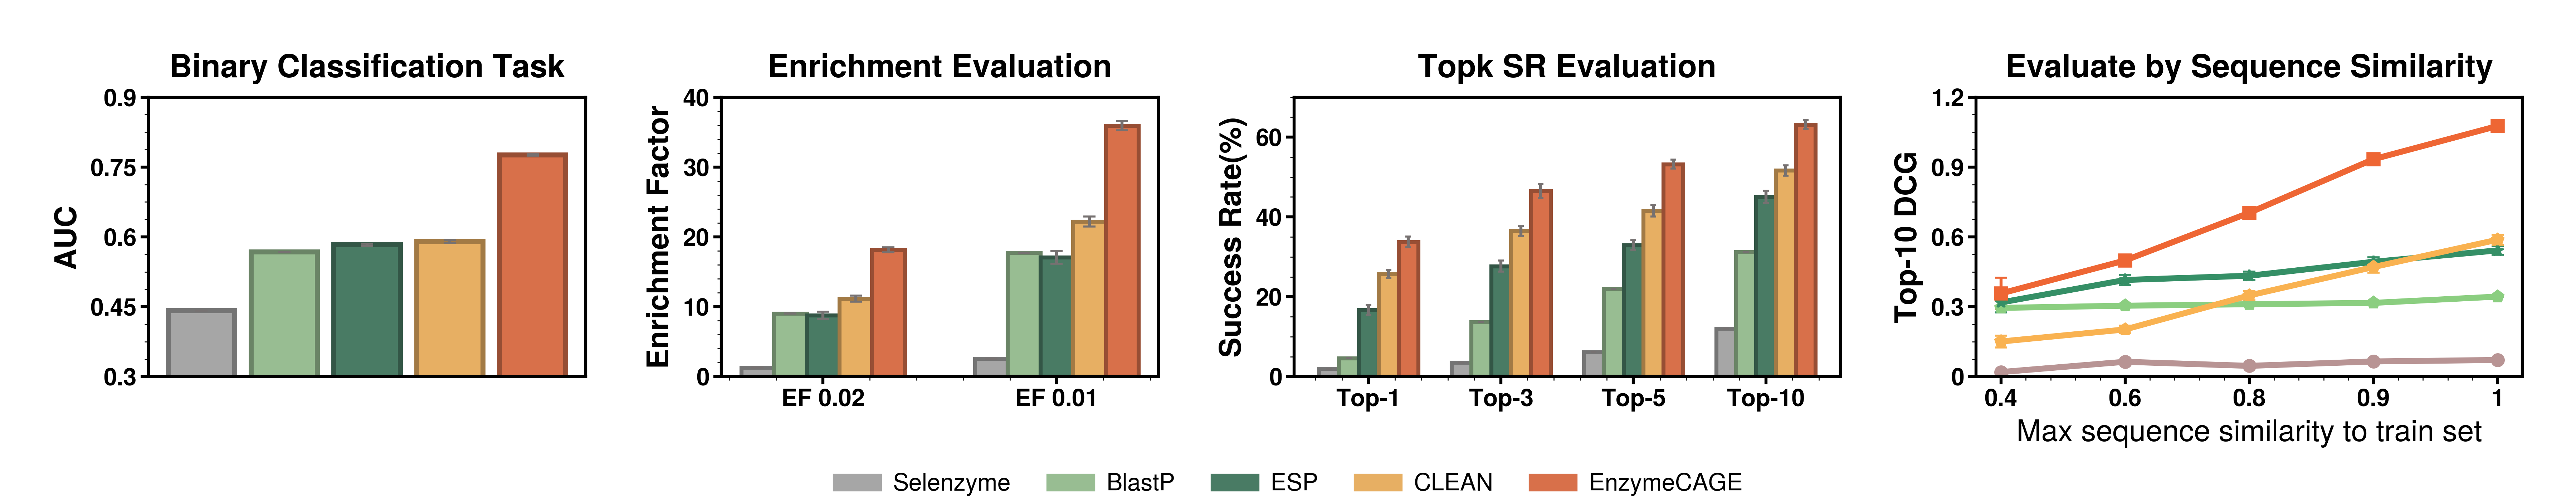

In [11]:


# Plot Bars
# colors = ['#c1cbd7', '#afb0b2', '#decece', '#e4dbd2', '#c5b8a5', '#b5c4b1']

# plt.figure(figsize=(8,6), dpi= 100)
fig, axs = plt.subplots(1, 4, figsize=(18, 3.5), gridspec_kw={'width_ratios': [0.8, 0.8, 1, 1]}, dpi=200, facecolor='white')
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

y_label_font_size = 15
x_label_font_size = 12

y_number_font_size = 12
titel_font_size = 16
border_width = 1.5
for ax in axs:
    ax.spines['top'].set_linewidth(border_width)
    ax.spines['right'].set_linewidth(border_width)
    ax.spines['bottom'].set_linewidth(border_width)
    ax.spines['left'].set_linewidth(border_width)
    ax.tick_params(axis='both', width=border_width)

i, j, k, n = 0, 1, 2, 3

##### AUC
colors = [method_to_color[method] for method in df_auc['Method'].values]
border_colors = [darken_color(color) for color in colors]
means = df_auc['AUC'].values
stds = df_auc['AUC std'].values
x_pos = np.arange(len(colors))
axs[i].bar(x_pos, means, yerr=stds, color=colors, ecolor=errbar_color, edgecolor=border_colors, linewidth=2.5, width=0.8)
axs[i].set_title("Binary Classification Task", fontsize=titel_font_size, pad=10, fontweight='bold')
axs[i].set_ylabel('AUC', fontsize=y_label_font_size, fontweight='bold')
axs[i].set_ylim(0.3, 0.9)
axs[i].set_yticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
axs[i].tick_params(axis='y', labelsize=y_number_font_size)
for tick in axs[i].get_yticklabels():
    tick.set_fontweight('bold')
axs[i].set_xticks([])  # 隐藏 x 轴的文字
axs[i].grid(False)
axs[i].yaxis.set_major_locator(MaxNLocator(nbins=4))

##### Top-10 DCG
# method_list = df_overall['Method'].values
# colors = [method_to_color[method] for method in method_list]
# border_colors = [darken_color(color) for color in colors]
# means_top10_dcg = df_overall['Top-10 DCG'].values
# stds = df_overall['Top-10 DCG std'].values
# axs[n].bar(method_list, means_top10_dcg, yerr=stds, color=colors, ecolor=errbar_color, edgecolor=border_colors, linewidth=2.5, width=0.8)
# axs[n].set_title("Top-10 DCG Evaluation", fontsize=titel_font_size, pad=10, fontweight='bold')
# axs[n].set_ylabel('DCG', fontsize=y_label_font_size, fontweight='bold')
# axs[n].set_ylim(0, 1.2)
# axs[n].set_yticks([0, 0.3, 0.6, 0.9, 1.2])
# axs[n].tick_params(axis='y', labelsize=y_number_font_size)
# for tick in axs[n].get_yticklabels():
#     tick.set_fontweight('bold')
# axs[n].set_xticks([])  # 隐藏 x 轴的文字
# axs[n].grid(False)

method_to_marker = {
    'EnzymeCAGE': 's',
    'Selenzyme': 'o',
    'CLEAN': 'p',
    'BlastP': 'p',
    'GVP-FP': 'v',
    'ESP': '*'
}

# similarity_list = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
similarity_list = [0.4, 0.6, 0.8, 0.9, 1]
method_list = df_dcg_simi['Method'].values
data_cols = [f'Max-simi_{i}' for i in similarity_list]
std_cols = [f'Max-simi_{i} std' for i in similarity_list]
data = df_dcg_simi[data_cols].values.transpose()
stds = df_dcg_simi[std_cols].values.transpose()

for idx, column in enumerate(method_list):
    color = lighten_color(method_to_color[column], 0.2)
    axs[n].errorbar(range(len(data)), data[:, idx], yerr=stds[:, idx], marker=method_to_marker[column], linewidth=3, elinewidth=1.5, color=color, label=column)
axs[n].set_xlabel('Max sequence similarity to train set', fontsize=y_label_font_size)
axs[n].set_ylabel('Top-10 DCG', fontsize=y_label_font_size, fontweight='bold')
axs[n].set_title('Evaluate by Sequence Similarity', fontsize=titel_font_size, fontweight='bold', pad=10)
axs[n].grid(False)
axs[n].set_ylim(0, 1.2)
axs[n].yaxis.set_major_locator(MaxNLocator(nbins=4))
axs[n].xaxis.set_major_locator(MaxNLocator(nbins=4))
axs[n].set_xticks(range(len(data)))
axs[n].set_xticklabels(similarity_list)
axs[n].set_yticks([0, 0.3, 0.6, 0.9, 1.2])
# axs[j].set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5])
axs[n].tick_params(axis='y', labelsize=y_number_font_size)
axs[n].tick_params(axis='x', labelsize=y_number_font_size)
for tick in axs[n].get_yticklabels():
    tick.set_fontweight('bold')
for tick in axs[n].get_xticklabels():
    tick.set_fontweight('bold')

##### EF
index = ['EF 0.02', 'EF 0.01']
columns = df_overall['Method'].values
data = df_overall[['EF 0.02', 'EF 0.01']].values.transpose()
stds = df_overall[['EF 0.02 std', 'EF 0.01 std']].values.transpose()
bar_width = 0.14
bar_gap = 0.0
num_methods = len(columns)
for i in range(num_methods):
    method = columns[i]
    c = method_to_color[method]
    cb = darken_color(c)
    colors = [c] * len(index)
    border_colors = [cb] * len(index)
    pos = np.arange(len(index)) + i * (bar_width + bar_gap)
    axs[j].bar(pos, data[:, i], bar_width, yerr=stds[:, i], color=colors, ecolor=errbar_color, edgecolor=border_colors, linewidth=2)
axs[j].set_xticks(np.arange(len(index)) + (num_methods - 1) * (bar_width + bar_gap) / 2)
# axs[k].set_xticks([])
axs[j].set_xticklabels(index, fontsize=x_label_font_size, fontweight='bold')
axs[j].set_ylim(0, 40)
axs[j].set_yticks([0, 10, 20, 30, 40])
axs[j].set_title("Enrichment Evaluation", fontsize=titel_font_size, pad=10, fontweight='bold')
axs[j].set_ylabel('Enrichment Factor', fontsize=y_label_font_size, fontweight='bold')
axs[j].grid(False)
axs[j].tick_params(axis='y', labelsize=y_number_font_size)
for tick in axs[j].get_yticklabels():
    tick.set_fontweight('bold')


##### Topk SR
index = ['Top-1', 'Top-3', 'Top-5', 'Top-10']
method_list = df_overall['Method'].values
data = df_overall[[f'Top-{k} SR' for k in [1, 3, 5, 10]]].values.transpose() * 100
stds = df_overall[[f'Top-{k} SR std' for k in [1, 3, 5, 10]]].values.transpose() * 100
bar_width = 0.15
bar_gap = 0.0
num_methods = len(method_list)
for i in range(num_methods):
    method = method_list[i]
    c = method_to_color[method]
    cb = darken_color(c)
    colors = [c] * len(index)
    border_colors = [cb] * len(index)
    pos = np.arange(len(index)) + i * (bar_width + bar_gap)
    axs[k].bar(pos, data[:, i], bar_width, yerr=stds[:, i], color=colors, ecolor=errbar_color, edgecolor=border_colors, linewidth=2, capsize=1.5)
axs[k].set_xticks(np.arange(len(index)) + (num_methods - 1) * (bar_width + bar_gap) / 2)
# axs[k].set_xticks([])
axs[k].set_xticklabels(index, fontsize=x_label_font_size, fontweight='bold')
axs[k].set_ylim(0, 70)
axs[k].set_title("Topk SR Evaluation", fontsize=titel_font_size, pad=10, fontweight='bold')
axs[k].set_ylabel('Success Rate(%)', fontsize=y_label_font_size, fontweight='bold')
axs[k].grid(False)
axs[k].tick_params(axis='y', labelsize=y_number_font_size)
for tick in axs[k].get_yticklabels():
    tick.set_fontweight('bold')


legend_labels = method_list
legend_info = [plt.Rectangle((0,0),1,1,color=method_to_color[method]) for method in method_list]


fig.legend(legend_info, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 0.08), ncol=len(legend_labels), fontsize=12, frameon=False)


# plt.tight_layout()
plt.tight_layout(pad=3.0)

# plt.savefig('./plots/new_enz_auc-dcg-ef-sr.png', format='png', dpi=100, bbox_inches='tight')
plt.show()

### 雷达图

In [12]:
dcg_ec_split_path = os.path.join(result_dir, 'dcg_ec_split.csv')
df_dcg_ec = pd.read_csv(dcg_ec_split_path)

In [13]:
ef1_ec_split_path = os.path.join(result_dir, 'ef1_ec_split.csv')
df_ef1_ec = pd.read_csv(ef1_ec_split_path)

In [14]:
df_ef1_ec = df_ef1_ec[df_ef1_ec['Method'] != 'GVP-FP']

In [15]:
df_ef1_ec

,Method,EC-1,EC-2,EC-3,EC-4,EC-5,EC-6
0,Selenzyme,0.000000,0.000000,0.000000,0.000000,7.383824,7.983038
1,BlastP,3.716227,12.809266,29.018620,13.557110,27.151876,21.579265
2,ESP,18.054365,9.093218,32.358375,16.312484,20.445650,10.161297
3,CLEAN,15.864964,27.128391,26.811036,23.141766,21.658167,18.909450
5,EnzymeCAGE,37.666914,38.420435,36.484467,31.138208,40.668731,35.362970


In [16]:
from math import pi

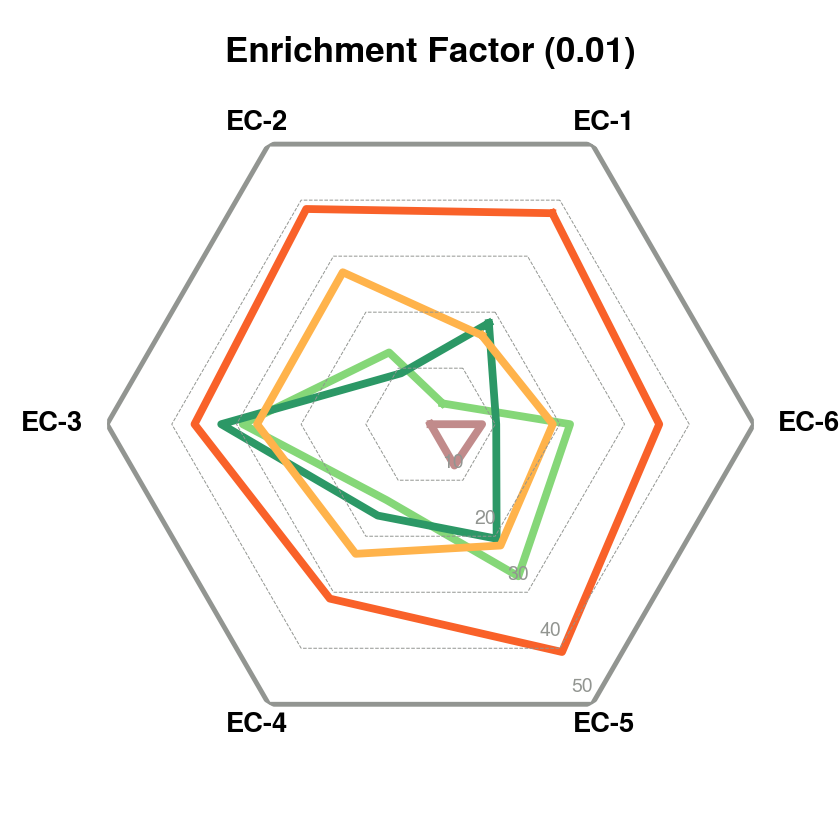

In [18]:
df = df_ef1_ec
categories = ['EC-1', 'EC-2', 'EC-3', 'EC-4', 'EC-5', 'EC-6']

angles = [4/12*pi, 8/12*pi, 12/12*pi, 16/12*pi, 20/12*pi, 0/12*pi, 4/12*pi]

fig, ax = plt.subplots(figsize=(6, 6), dpi=70, subplot_kw=dict(polar=True), facecolor='white')

# 绘制每个方法的雷达图
method_list = df['Method'].values
for method in method_list:
    values = df[df['Method'] == method].values[0, 1:].tolist()
    values += values[:1]
    color = lighten_color(method_to_color[method.split('_')[0]])
    
    ax.plot(angles, values, linewidth=4, linestyle='solid', label=method, color=color)
    # ax.fill(angles, values, alpha=0.25, color=color)

# 添加标签
offset = 0.7  # 设置偏移量
offset_list = [0.75, 0.75, 0.70, 0.75, 0.75, 0.70]
for i, label in enumerate(categories):
    offset = offset_list[i]
    angle_rad = angles[i]
    if angle_rad == 0:
        ha = 'left'
    elif angle_rad == pi:
        ha = 'right'
    else:
        ha = 'center'
    
    # ax.text(angle_rad, 1 + offset, label, size=14, horizontalalignment=ha, verticalalignment='center', color='black', fontweight='bold')
    ax.text(angle_rad, 53 + offset, label, size=14, horizontalalignment=ha, verticalalignment='center', color='black', fontweight='bold')


ax.set_rlabel_position(0)
# plt.yticks([0.4, 0.8, 1.2, 1.6], ["0.4", "0.8", "1.2", "1.6"], color="grey", size=10, visible=False)
plt.yticks([10, 20, 30, 40, 50], ["10", "20", "30", "40", "50"], color="grey", size=10, visible=False)
plt.ylim(0, 50)
y_ticks = [10, 20, 30, 40, 50]
for y in y_ticks:
    ax.text(10/6*pi, y-3, str(y), horizontalalignment='center', verticalalignment='center', size=10, color="grey")
# plt.ylim(0, 1.6)

# 隐藏默认极坐标网格和刻度
ax.xaxis.set_visible(False)
ax.grid(False)
# ax.yaxis.set_visible(False)

# 添加标题和图例
plt.title('Enrichment Factor (0.01)', fontsize=18, pad=20, fontweight='bold')
# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# 设置雷达图为多边形
ax.spines['polar'].set_visible(False)  # 隐藏默认极坐标边框

# 添加多边形网格
for i in range(len(plt.yticks()[0])):
    y = plt.yticks()[0][i]
    ax.plot(angles, [y]*len(angles), color='grey', linestyle='dashed', linewidth=0.5)

# 添加多边形边框
ax.plot(angles, [50]*len(angles), color='grey', linewidth=2.5)

# plt.savefig('./plots/new_enz_ef1-by-ec.png', format='png', dpi=100, bbox_inches='tight')
plt.show()

In [1218]:
# df_family_dcg = pd.read_excel(result_data_path, sheet_name='new-enz_family-dcg')

In [1219]:
# families = df_family_ef1['Family'].values
# ef1_list = df_family_ef1['Top-10 DCG'].values

In [19]:
family_ef1_path = os.path.join(result_dir, 'family_eval_result.csv')
df_family_ef = pd.read_csv(family_ef1_path)

In [20]:
families = df_family_ef['Family'].values
ef_list = df_family_ef['EF 0.01'].values

In [21]:
def generate_continuous_colors(start_color, end_color, n):
    """
    Generate a list of n continuous colors transitioning from start_color to end_color.
    
    Parameters:
        start_color (str): Starting color in HEX format.
        end_color (str): Ending color in HEX format.
        n (int): Number of colors to generate.
    
    Returns:
        list: A list of n continuous colors.
    """
    # Convert start_color and end_color to RGB
    start_rgb = mcolors.ColorConverter().to_rgb(start_color)
    end_rgb = mcolors.ColorConverter().to_rgb(end_color)
    
    # Generate n continuous colors
    continuous_colors = []
    for i in range(n):
        # Interpolate between start_color and end_color
        r = start_rgb[0] + (end_rgb[0] - start_rgb[0]) * (i / (n - 1))
        g = start_rgb[1] + (end_rgb[1] - start_rgb[1]) * (i / (n - 1))
        b = start_rgb[2] + (end_rgb[2] - start_rgb[2]) * (i / (n - 1))
        
        # Convert RGB to HEX and add to the list
        continuous_colors.append(mcolors.to_hex((r, g, b)))
    
    return continuous_colors

In [22]:
# start_color = '#b5c4b1'
# end_color = darken_color('#b5c4b1')
start_color = end_color = darken_color(method_to_color['EnzymeCAGE'], amount=0.1)
n_color = len(families)
colors = generate_continuous_colors(start_color, end_color, n_color)
border_colors = [darken_color(color) for color in colors]

In [23]:
color = method_to_color['EnzymeCAGE']

/var/folders/sl/70q4q1hs05v81xd6vn4qhcf80000gn/T/ipykernel_97757/3832336677.py:16: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='y', nbins=len(categories))


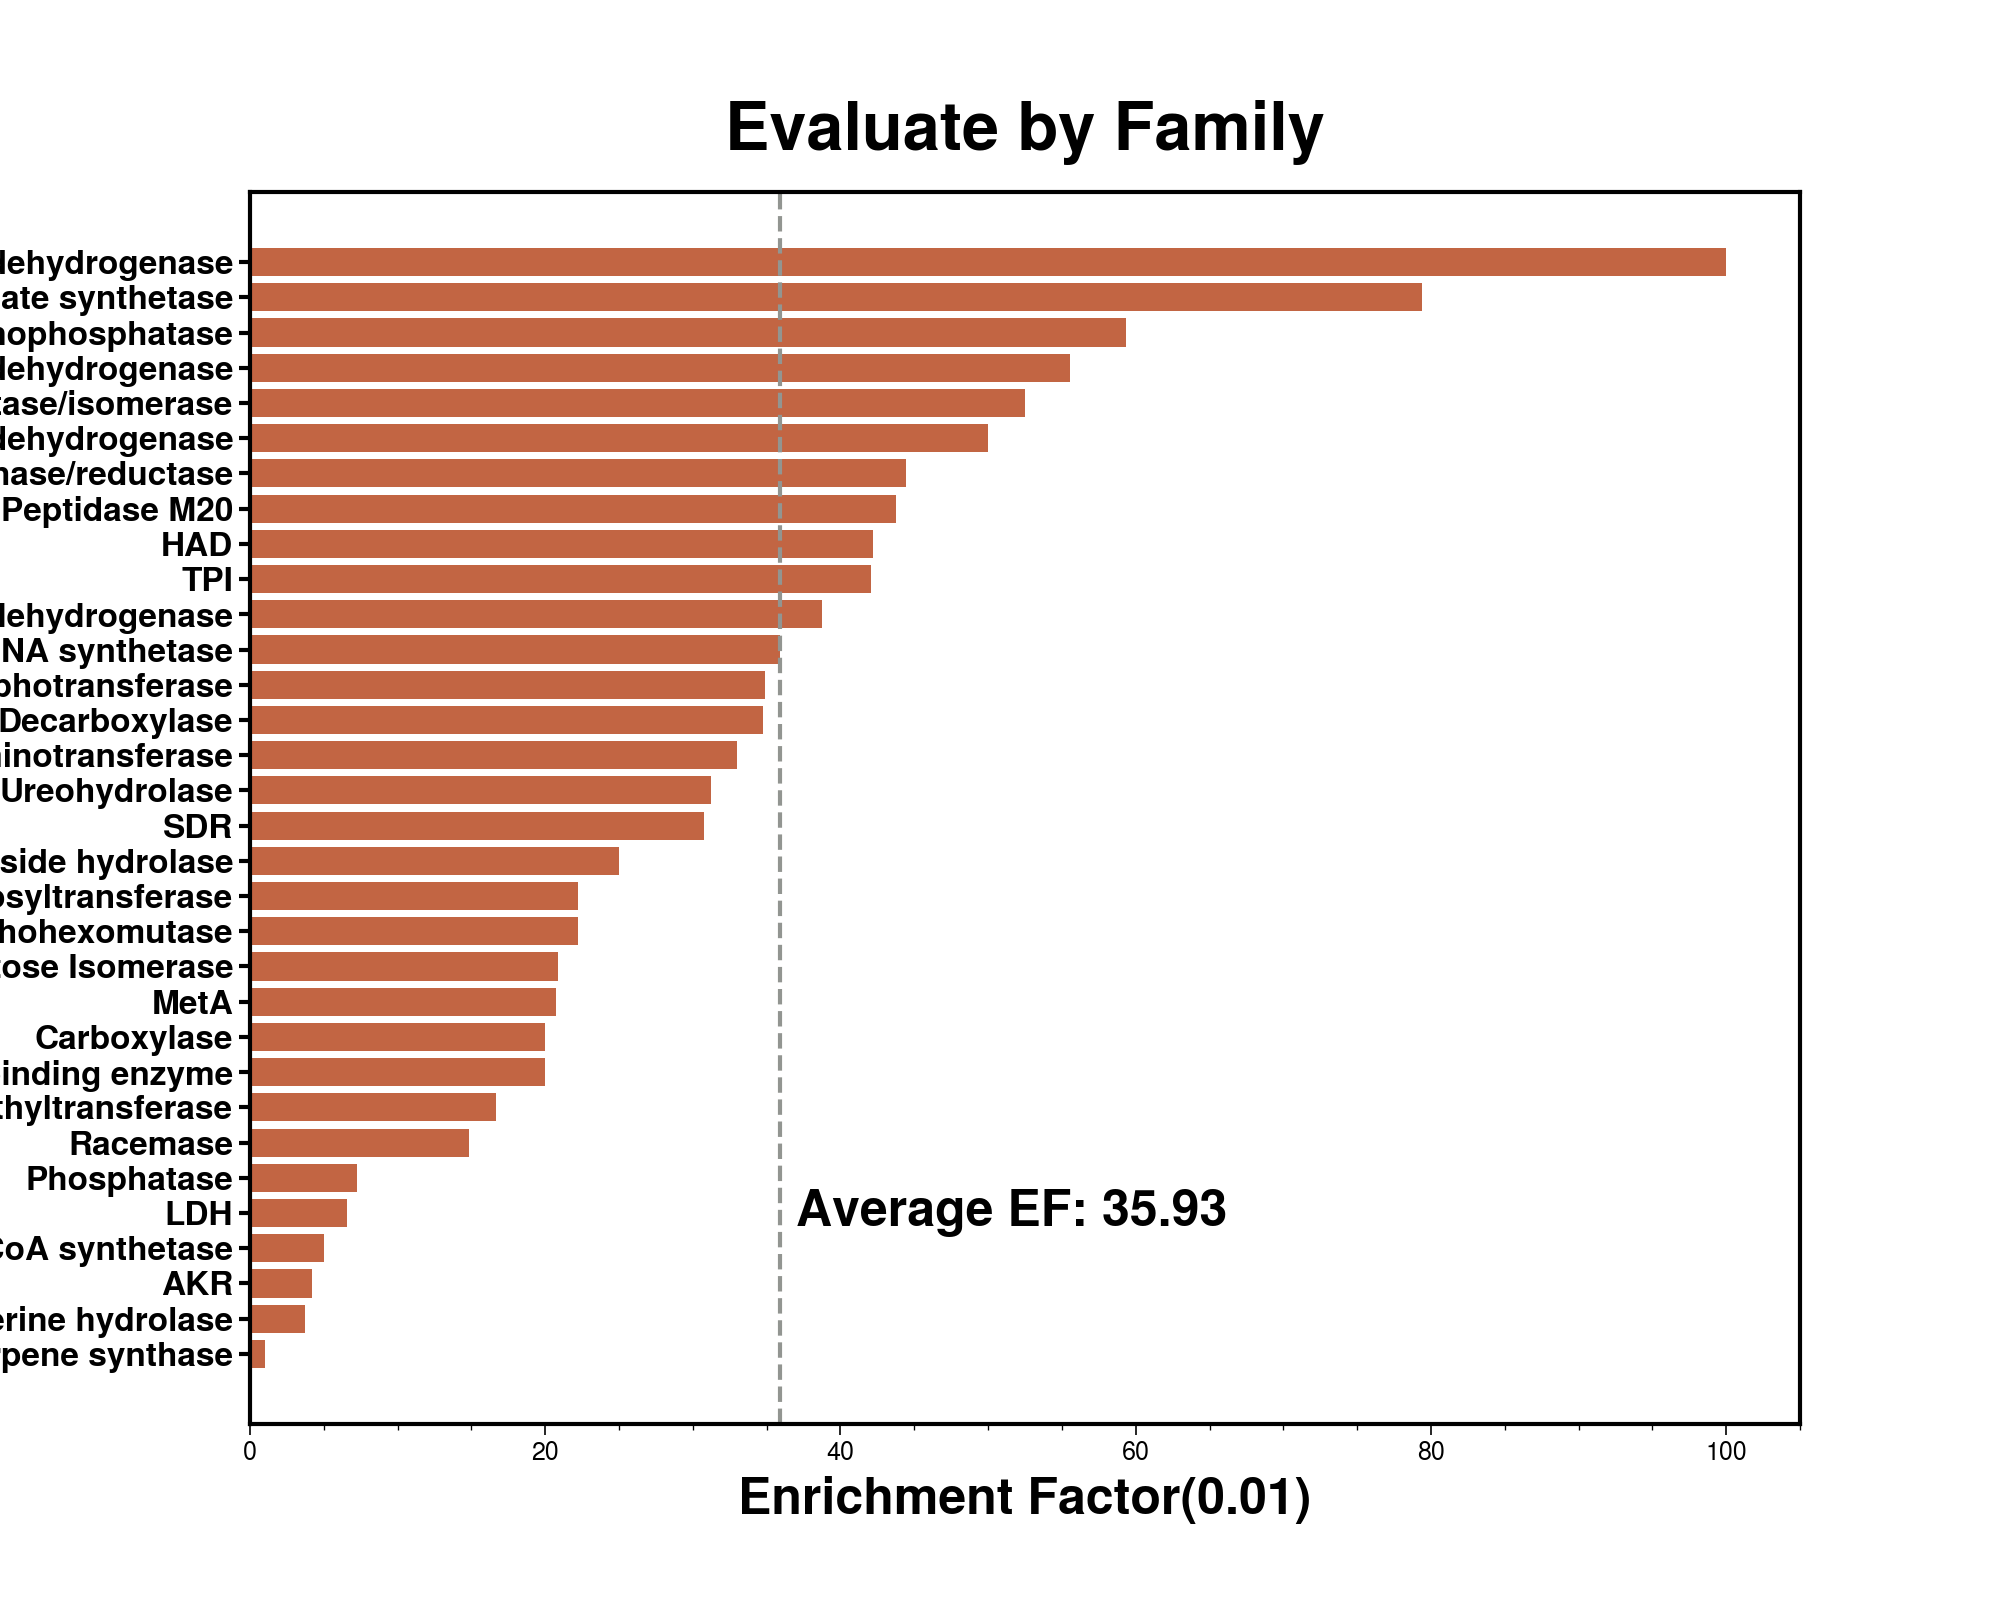

In [24]:
# plt.figure(figsize=(10, 6), facecolor='white')
fig, ax = plt.subplots(figsize=(10, 8), dpi=100, facecolor='white')

ax.spines['top'].set_linewidth(border_width)
ax.spines['right'].set_linewidth(border_width)
ax.spines['bottom'].set_linewidth(border_width)
ax.spines['left'].set_linewidth(border_width)
ax.tick_params(axis='y', width=border_width, labelsize=12)
# 绘制横向柱状图
ax.barh(families, ef_list, color=colors, linewidth=0.5)
# ax.barh(families, dcg_list, color=color, linewidth=0.5)

# 添加标题和标签
ax.set_title('Evaluate by Family', fontsize=24, pad=15, fontweight='bold')
ax.set_xlabel('Enrichment Factor(0.01)', fontsize=18, fontweight='bold')
plt.locator_params(axis='y', nbins=len(categories))
plt.tick_params(axis='y', which='minor', left=False)
# for tick in ax.get_xticklabels():
#     tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

average_ef = 35.93
ax.axvline(x=average_ef, color='gray', linestyle='--', linewidth=1.5)
ax.text(37, 4, f'Average EF: {average_ef}', 
        fontsize=18, verticalalignment='center', color='black', fontweight='bold')

ax.grid(False)
plt.subplots_adjust()
# 显示图形
plt.savefig('./plots/new_enz_family-ef.png', format='png', dpi=100, bbox_inches='tight')
plt.show()


## Evaluate on Orpha-194

In [25]:
df_new_rxn_simi = pd.read_csv('./example_data/orphan-rxns/new-rxn_simi.csv')
df_new_rxn_simi = df_new_rxn_simi[(df_new_rxn_simi['Similarity'] > 0.33)]
# df_new_rxn_simi = df_new_rxn_simi[(df_new_rxn_simi['Similarity'] > 0.33) & (df_new_rxn_simi['Similarity'] <= 0.89)]
simi_list = df_new_rxn_simi['Similarity'].values

In [26]:
result_dir = './example_data/orphan-rxns'

overall_path = os.path.join(result_dir, 'overall_orphan.csv')
df_overall = pd.read_csv(overall_path)

auc_path = os.path.join(result_dir, 'AUC.csv')
df_auc = pd.read_csv(auc_path)

In [27]:
dcg_simi_split_path = os.path.join(result_dir, 'simi_split_dcg.csv')
df_dcg_simi = pd.read_csv(dcg_simi_split_path)

In [28]:
df_auc = df_auc[df_auc['Method'] != 'GVP-FP']

In [29]:
df_auc

,Method,AUC,AUC std
0,Selenzyme,0.7111,0.0000
1,ESP,0.6702,0.0082
2,CLIPZyme,0.6521,0.0073
4,EnzymeCAGE,0.7800,0.0060


In [30]:
df_dcg_simi

,Method,Max-simi_0.6,Max-simi_0.6 std,Max-simi_0.7,Max-simi_0.7 std,Max-simi_0.8,Max-simi_0.8 std,Max-simi_0.9,Max-simi_0.9 std
0,Selenzyme,0.000000,0.000000,0.118826,1.390000e-17,0.159597,0.000000,0.193741,0.000000
1,ESP,0.220386,0.021941,0.302626,4.921532e-02,0.263295,0.031924,0.258870,0.027292
2,CLIPZyme,0.137516,0.032152,0.148954,2.149151e-02,0.106928,0.012400,0.118020,0.011000
3,EnzymeCAGE,0.235036,0.056168,0.342553,6.918042e-02,0.403505,0.035314,0.436280,0.026966


In [31]:
df_overall

,Method,Top-10 DCG,Top-10 DCG std,EF 0.01,EF 0.01 std,EF 0.02,EF 0.02 std,Top-1 SR,Top-1 SR std,Top-3 SR,Top-3 SR std,Top-5 SR,Top-5 SR std,Top-10 SR,Top-10 SR std
0,Selenzyme,0.193741,0.000000,5.277868,0.000000,2.670616,0.000000,0.046392,0.000000,0.061856,0.000000,0.082474,0.000000,0.123711,0.000000
1,ESP,0.258870,0.013928,7.098480,0.065315,3.612004,0.031400,0.051546,0.006935,0.087629,0.007393,0.154639,0.013922,0.231959,0.018298
2,CLIPZyme,0.118020,0.008260,7.485217,0.593825,5.488770,0.239326,0.030928,0.004913,0.041237,0.005849,0.061856,0.008216,0.077320,0.009252
3,EnzymeCAGE,0.436280,0.026966,14.230962,1.109846,7.243086,0.554248,0.125773,0.016169,0.174227,0.011934,0.196907,0.018268,0.242268,0.016300


In [32]:
simi_list = [i for i in simi_list if i < 0.898]

### 分布图 & 柱状图 & 折线图

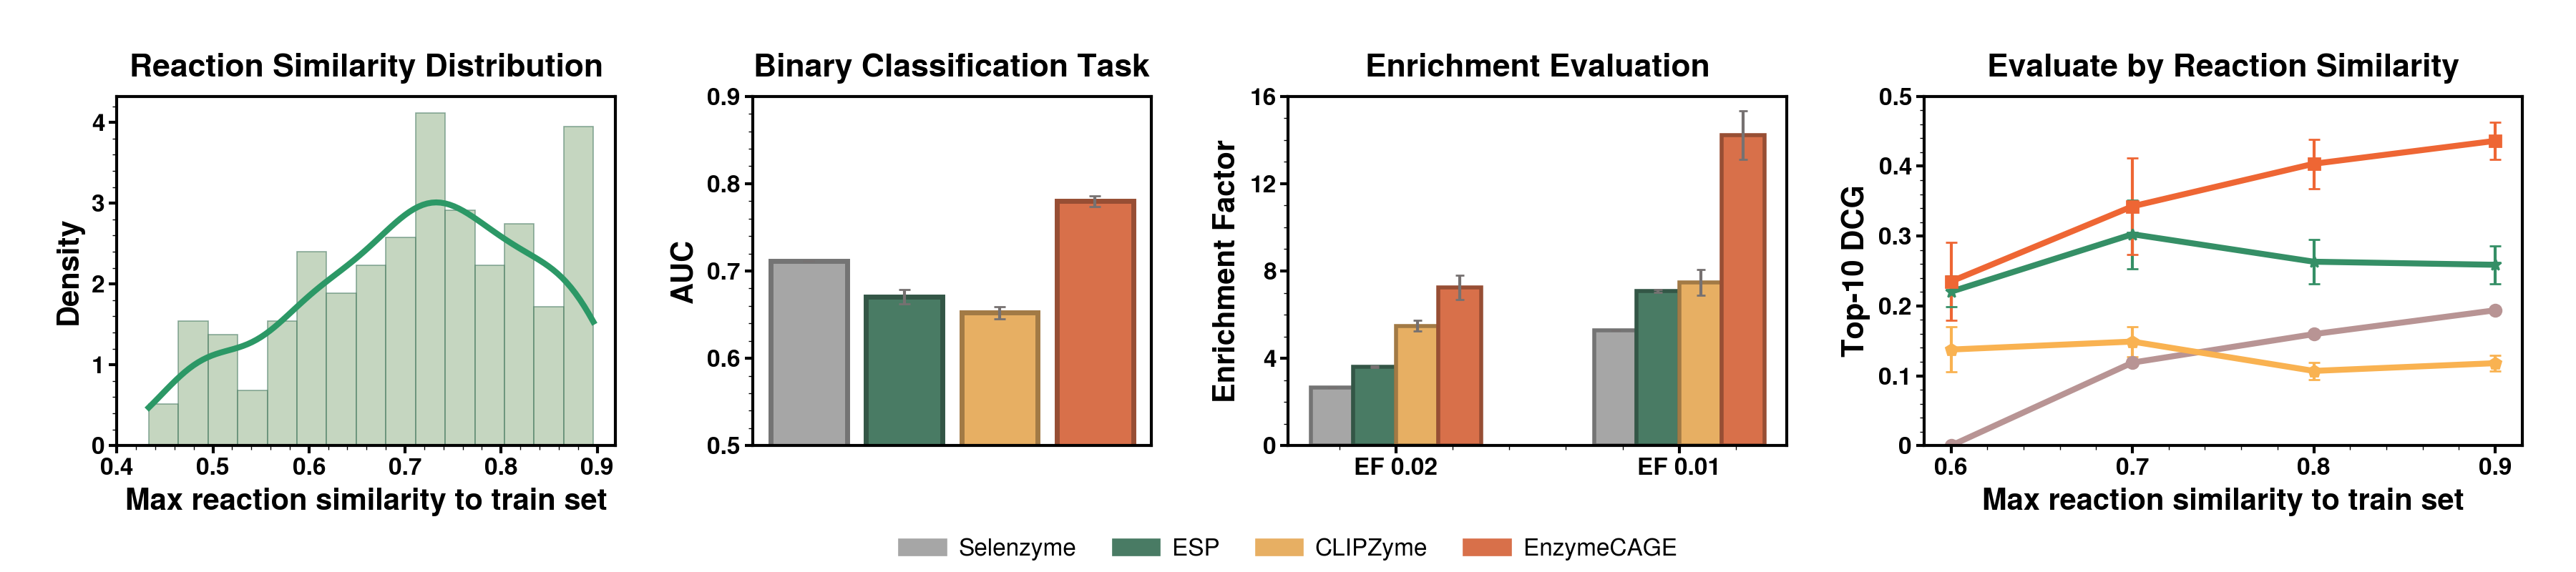

In [34]:
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
from scipy import stats


# Plot Bars
# colors = ['#c1cbd7', '#afb0b2', '#decece', '#e4dbd2', '#c5b8a5', '#b5c4b1']

# plt.figure(figsize=(8,6), dpi= 100)
fig, axs = plt.subplots(1, 4, figsize=(18, 4), gridspec_kw={'width_ratios': [1, 0.8, 1, 1.2]}, dpi=100, facecolor='white')  # 创建两个子图
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

y_label_font_size = 15
x_label_font_size = 12

y_number_font_size = 12
titel_font_size = 16
border_width = 1.5
for ax in axs:
    ax.spines['top'].set_linewidth(border_width)
    ax.spines['right'].set_linewidth(border_width)
    ax.spines['bottom'].set_linewidth(border_width)
    ax.spines['left'].set_linewidth(border_width)
    ax.tick_params(axis='both', width=border_width)


i, j, k, n = 1, 3, 0, 2

##### AUC 
colors = [method_to_color[method] for method in df_auc['Method'].values]
border_colors = [darken_color(color) for color in colors]
means = df_auc['AUC'].values
stds = df_auc['AUC std'].values
x_pos = np.arange(len(colors))
axs[i].bar(x_pos, means, yerr=stds, color=colors, ecolor=errbar_color, edgecolor=border_colors, linewidth=2.5, width=0.8)
axs[i].set_title("Binary Classification Task", fontsize=titel_font_size, pad=10, fontweight='bold')
axs[i].set_ylabel('AUC', fontsize=y_label_font_size, fontweight='bold')
axs[i].set_ylim(0.5, 0.9)
axs[i].tick_params(axis='y', labelsize=y_number_font_size)
for tick in axs[i].get_yticklabels():
    tick.set_fontweight('bold')
axs[i].set_xticks([])  # 隐藏 x 轴的文字
axs[i].grid(False)
axs[i].yaxis.set_major_locator(MaxNLocator(nbins=4))

##### Top-10 DCG similarity split 
method_to_marker = {
    'EnzymeCAGE': 's',
    'Selenzyme': 'o',
    'ESM-FP': 'p',
    'CLIPZyme': 'p',
    'GVP-FP': 'v',
    'ESP': '*'
}

method_list = df_dcg_simi['Method'].values
data_cols = ['Max-simi_0.6', 'Max-simi_0.7', 'Max-simi_0.8', 'Max-simi_0.9']
std_cols = ['Max-simi_0.6 std', 'Max-simi_0.7 std', 'Max-simi_0.8 std', 'Max-simi_0.9 std']
data = df_dcg_simi[data_cols].values.transpose()
stds = df_dcg_simi[std_cols].values.transpose()

for idx, column in enumerate(method_list):
    color = lighten_color(method_to_color[column], 0.2)
    axs[j].errorbar(range(len(data)), data[:, idx], yerr=stds[:, idx], marker=method_to_marker[column], linewidth=3, elinewidth=1.5, color=color, label=column)
    
axs[j].set_xlabel('Max reaction similarity to train set', fontsize=y_label_font_size, fontweight='bold')
axs[j].set_ylabel('Top-10 DCG', fontsize=y_label_font_size, fontweight='bold')
axs[j].set_title('Evaluate by Reaction Similarity', fontsize=titel_font_size, fontweight='bold', pad=10)
axs[j].grid(False)
axs[j].set_ylim(0, 0.5)
axs[j].yaxis.set_major_locator(MaxNLocator(nbins=4))
axs[j].xaxis.set_major_locator(MaxNLocator(nbins=4))
axs[j].set_xticks(range(len(data)))
axs[j].set_xticklabels([0.6, 0.7, 0.8, 0.9])
axs[j].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
# axs[j].set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5])
axs[j].tick_params(axis='y', labelsize=y_number_font_size)
axs[j].tick_params(axis='x', labelsize=y_number_font_size)
for tick in axs[j].get_yticklabels():
    tick.set_fontweight('bold')
for tick in axs[j].get_xticklabels():
    tick.set_fontweight('bold')


##### Data distribution
axs[k].hist(simi_list, density=True, bins=15, color='#9FBC96', edgecolor='#497B64', alpha=0.6)  # 设置柱子的颜色、边缘颜色和透明度

# 计算核密度估计曲线
density = stats.gaussian_kde(simi_list)
x_vals = np.linspace(min(simi_list), max(simi_list), 100)
axs[k].plot(x_vals, density(x_vals), color=lighten_color('#497B64'), linewidth=3)

axs[k].set_xlabel('Max reaction similarity to train set', fontsize=y_label_font_size, fontweight='bold')
axs[k].set_ylabel('Density', fontsize=y_label_font_size, fontweight='bold')
axs[k].set_title('Reaction Similarity Distribution', fontsize=titel_font_size, fontweight='bold', pad=10)
axs[k].grid(False)
# axs[k].set_ylim(0, 0.7)
axs[k].yaxis.set_major_locator(MaxNLocator(nbins=4))
axs[k].xaxis.set_major_locator(MaxNLocator(nbins=4))
axs[k].set_xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
axs[k].set_yticks([0, 1, 2, 3, 4])
# axs[k].set_xticklabels(df_dcg_result['Top10 DCG'].values)
axs[k].tick_params(axis='y', labelsize=y_number_font_size)
axs[k].tick_params(axis='x', labelsize=y_number_font_size)
for tick in axs[k].get_yticklabels():
    tick.set_fontweight('bold')
for tick in axs[k].get_xticklabels():
    tick.set_fontweight('bold')


##### Enrichment factor
index = ['EF 0.02', 'EF 0.01']
columns = df_overall['Method'].values
data = df_overall[['EF 0.02', 'EF 0.01']].values.transpose()
stds = df_overall[['EF 0.02 std', 'EF 0.01 std']].values.transpose()
bar_width = 0.15
bar_gap = 0.0
num_methods = len(columns)
for i in range(num_methods):
    method = columns[i]
    c = method_to_color[method]
    cb = darken_color(c)
    colors = [c] * len(index)
    border_colors = [cb] * len(index)
    pos = np.arange(len(index)) + i * (bar_width + bar_gap)
    axs[n].bar(pos, data[:, i], bar_width, yerr=stds[:, i], color=colors, ecolor=errbar_color, edgecolor=border_colors, linewidth=2, capsize=2)
axs[n].set_xticks(np.arange(len(index)) + (num_methods - 1) * (bar_width + bar_gap) / 2)
axs[n].set_xticklabels(index, fontsize=x_label_font_size, fontweight='bold')
axs[n].set_ylim(0, 16)
axs[n].set_yticks([0, 4, 8, 12, 16])
axs[n].set_title("Enrichment Evaluation", fontsize=titel_font_size, pad=10, fontweight='bold')
axs[n].set_ylabel('Enrichment Factor', fontsize=y_label_font_size, fontweight='bold')
axs[n].grid(False)
axs[n].tick_params(axis='y', labelsize=y_number_font_size)
for tick in axs[n].get_yticklabels():
    tick.set_fontweight('bold')

# letters = ['a', 'b', 'c', 'd']
# pos_list = [()]
# for i, ax in enumerate(axs.flat):
#     ax.text(-0.1, 1.2, letters[i], transform=ax.transAxes, 
#             fontsize=24, fontweight='bold', va='top', ha='left')

legend_labels = df_overall['Method'].values
legend_info = [plt.Rectangle((0,0),1,1,color=method_to_color[method]) for method in legend_labels]

# 添加共享的图例
fig.legend(legend_info, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 0.08), ncol=len(legend_labels), fontsize=12, frameon=False)

# plt.tight_layout()
plt.tight_layout(pad=3.0)

# plt.savefig('./plots/new_rxn_auc-ef-dcg.png', format='png', dpi=100, bbox_inches='tight')
plt.show()

In [35]:
topk_sr_result_dict = {}
for topk in [1, 3, 5, 10]:
    df_sr_topk = pd.read_csv(f'{result_dir}/simi_split_Top{topk}-SR.csv')
    topk_sr_result_dict[f'Top-{topk}'] = df_sr_topk

In [36]:
topk_sr_result_dict['Top-1']['Method'].values

array(['Random', 'Selenzyme', 'ESP', 'CLIPZyme', 'EnzymeCAGE'],
      dtype=object)

In [37]:
method_list = topk_sr_result_dict['Top-1']['Method'].values

In [38]:
topk_sr_result_dict['Top-1']

,Method,Max-simi_0.6,Max-simi_0.6 std,Max-simi_0.7,Max-simi_0.7 std,Max-simi_0.8,Max-simi_0.8 std,Max-simi_0.9,Max-simi_0.9 std
0,Random,0.027907,0.017403,0.040964,0.005902,0.039716,0.005674,0.046392,0.008625
1,Selenzyme,0.000000,0.000000,0.012048,0.000000,0.042553,0.000000,0.046392,0.000000
2,ESP,0.052791,0.036900,0.074337,0.032282,0.063830,0.024921,0.051546,0.006935
3,CLIPZyme,0.049767,0.031029,0.036145,0.025813,0.021277,0.021912,0.030928,0.004913
4,EnzymeCAGE,0.079070,0.034806,0.093976,0.028916,0.119149,0.016420,0.125773,0.016169


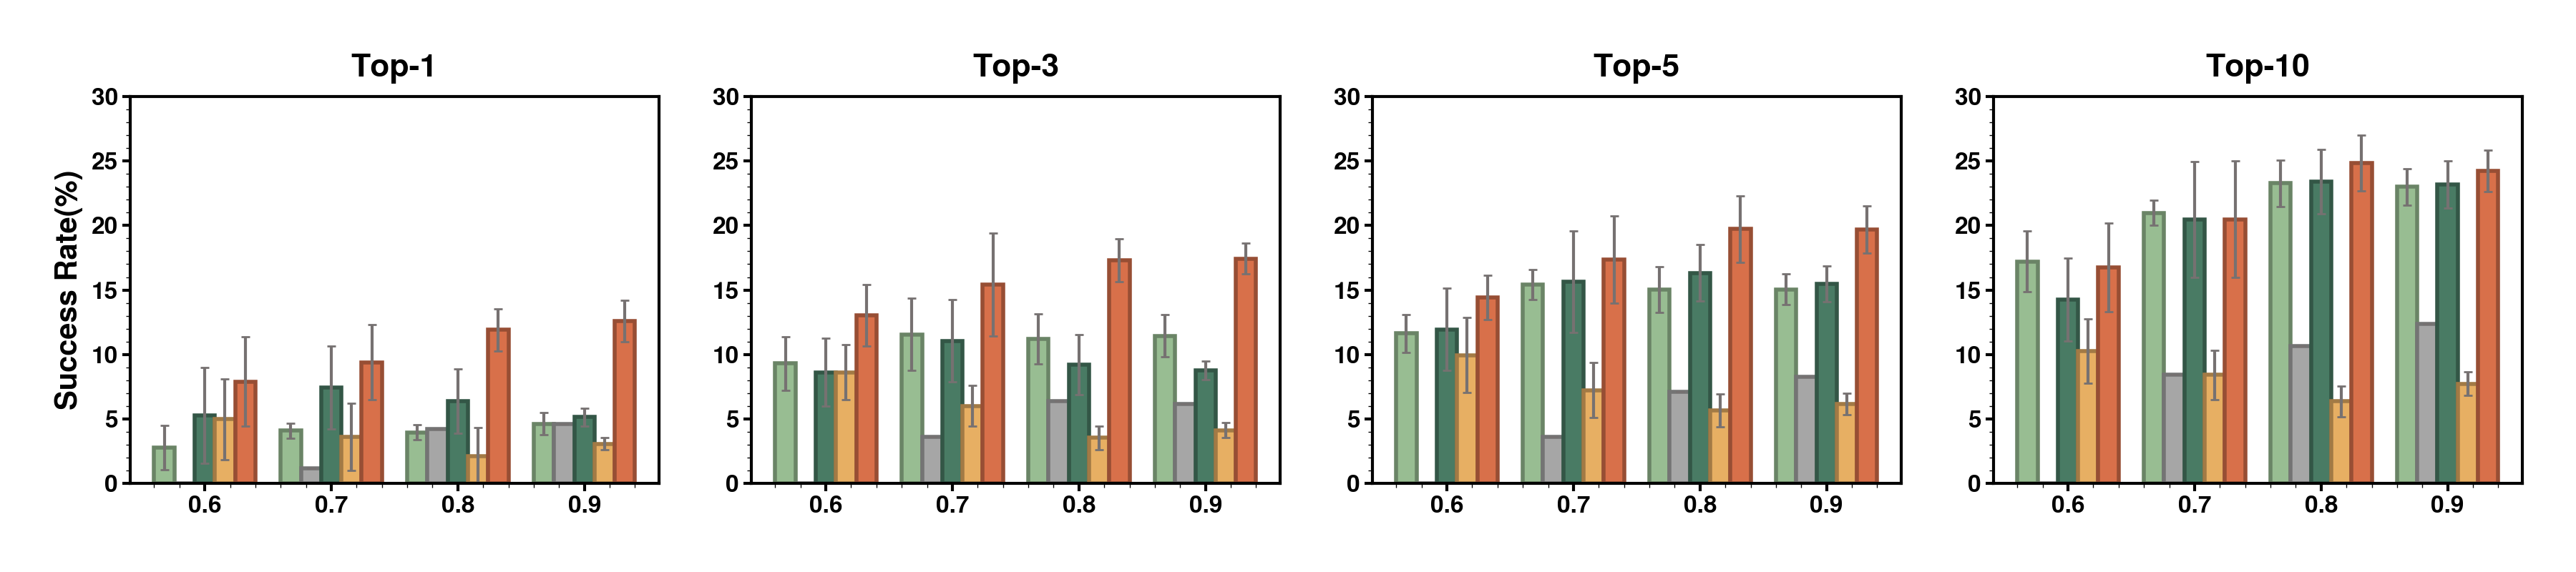

In [40]:
fig, axs = plt.subplots(1, 4, figsize=(18, 4), gridspec_kw={'width_ratios': [1,1,1,1]}, dpi=100, facecolor='white') 
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

y_label_font_size = 15
x_label_font_size = 12

y_number_font_size = 12
titel_font_size = 16
border_width = 1.5
for ax in axs:
    ax.spines['top'].set_linewidth(border_width)
    ax.spines['right'].set_linewidth(border_width)
    ax.spines['bottom'].set_linewidth(border_width)
    ax.spines['left'].set_linewidth(border_width)
    ax.tick_params(axis='both', width=border_width)

k = 0

data_cols = ['Max-simi_0.6', 'Max-simi_0.7', 'Max-simi_0.8', 'Max-simi_0.9']
std_cols = ['Max-simi_0.6 std', 'Max-simi_0.7 std', 'Max-simi_0.8 std', 'Max-simi_0.9 std']

topk_list = ['Top-1', 'Top-3', 'Top-5', 'Top-10']
for k, topk in enumerate(topk_list):
# 绘制多维柱状图
    df_sr_result = topk_sr_result_dict[topk]
    index = [0.6, 0.7, 0.8, 0.9]
    columns = df_sr_result['Method'].values
    # data = df_sr_result[df_sr_result['Max Similarity'] == 0.5].values[:, :-1] *100
    # data = df_sr_result[df_sr_result['Metric'] == topk].values[:, 1:-1] * 100
    data = df_sr_result[data_cols].values.transpose() * 100
    stds = df_sr_result[std_cols].values.transpose() * 100
    
    bar_width = 0.16
    bar_gap = 0.0
    num_methods = len(columns)
    for i in range(num_methods):
        method = columns[i]
        c = method_to_color[method]
        cb = darken_color(c)
        colors = [c] * len(index)
        border_colors = [cb] * len(index)
        pos = np.arange(len(index)) + i * (bar_width + bar_gap)
        axs[k].bar(pos, data[:, i], bar_width, yerr=stds[:, i], color=colors, ecolor=errbar_color, edgecolor=border_colors, linewidth=2, capsize=2)
        # print(pos, data[:, i])
        
    axs[k].set_xticks(np.arange(len(index)) + (num_methods - 1) * (bar_width + bar_gap) / 2)
    axs[k].set_xticklabels(index, fontsize=x_label_font_size, fontweight='bold')

    # y_min = max(data.min() - 10, 0)
    # y_max = min(data.max() + 10, 100)
    y_min, y_max = 0, 30
    axs[k].set_ylim(y_min, y_max)
    axs[k].set_title(f"{topk}", fontsize=titel_font_size, pad=10, fontweight='bold')
    if k == 0:
        axs[k].set_ylabel('Success Rate(%)', fontsize=y_label_font_size, fontweight='bold')
    # if k == 1:
    #     axs[k].set_xlabel('Max reaction similarity to train set', fontsize=y_label_font_size, fontweight='bold')
    axs[k].grid(False)
    axs[k].tick_params(axis='y', labelsize=y_number_font_size)
    for tick in axs[k].get_yticklabels():
        tick.set_fontweight('bold')


legend_info = [plt.Rectangle((0,0),1,1,color=method_to_color[method]) for method in method_list]
legend_labels = method_list

# 添加共享的图例
# fig.legend(legend_info, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 0.08), ncol=len(legend_labels), fontsize=12, frameon=False)

# plt.tight_layout()
plt.tight_layout(pad=3.0)

# plt.savefig('./plots/new_rxn_topkSR.png', format='png', dpi=100, bbox_inches='tight')
plt.show()

## Case study

In [43]:
df_case_study_result = pd.read_excel(result_data_path, sheet_name='case_study')

In [44]:
df_case_study_result

,Method,Topk EC,Quality,Percentage
0,af2 structure,4,Excellent,0.522
1,af2 structure,4,Good,0.131
2,af2 structure,4,Medium,0.127
3,alphafill pocket,4,Excellent,0.834
4,alphafill pocket,4,Good,0.060
5,alphafill pocket,4,Medium,0.045
6,af2 structure,3,Excellent,0.710
7,af2 structure,3,Good,0.105
8,af2 structure,3,Medium,0.098
9,alphafill pocket,3,Excellent,0.938


In [45]:
struct_types = set(df_case_study_result['Method'])
struct_types

{'af2 structure', 'alphafill pocket'}

In [46]:
topk_ecs = set(df_case_study_result['Topk EC'])
qualities = set(df_case_study_result['Quality'])

In [47]:
data = {method: {topk_ec: {quality: 0 for quality in qualities} for topk_ec in topk_ecs} for method in struct_types}

for _, row in df_case_study_result.iterrows():
    method = row['Method']
    topk_ec = row['Topk EC']
    quality = row['Quality']
    percentage = row['Percentage']
    data[method][topk_ec][quality] = percentage

In [48]:
data.keys()

dict_keys(['af2 structure', 'alphafill pocket'])

In [49]:
data

{'af2 structure': {1: {'Good': 0.076, 'Medium': 0.068, 'Excellent': 0.819},
  2: {'Good': 0.097, 'Medium': 0.083, 'Excellent': 0.752},
  3: {'Good': 0.105, 'Medium': 0.098, 'Excellent': 0.71},
  4: {'Good': 0.131, 'Medium': 0.127, 'Excellent': 0.522}},
 'alphafill pocket': {1: {'Good': 0.018, 'Medium': 0.01, 'Excellent': 0.968},
  2: {'Good': 0.024, 'Medium': 0.015, 'Excellent': 0.952},
  3: {'Good': 0.028, 'Medium': 0.02, 'Excellent': 0.938},
  4: {'Good': 0.06, 'Medium': 0.045, 'Excellent': 0.834}}}

In [50]:
data.keys()

dict_keys(['af2 structure', 'alphafill pocket'])

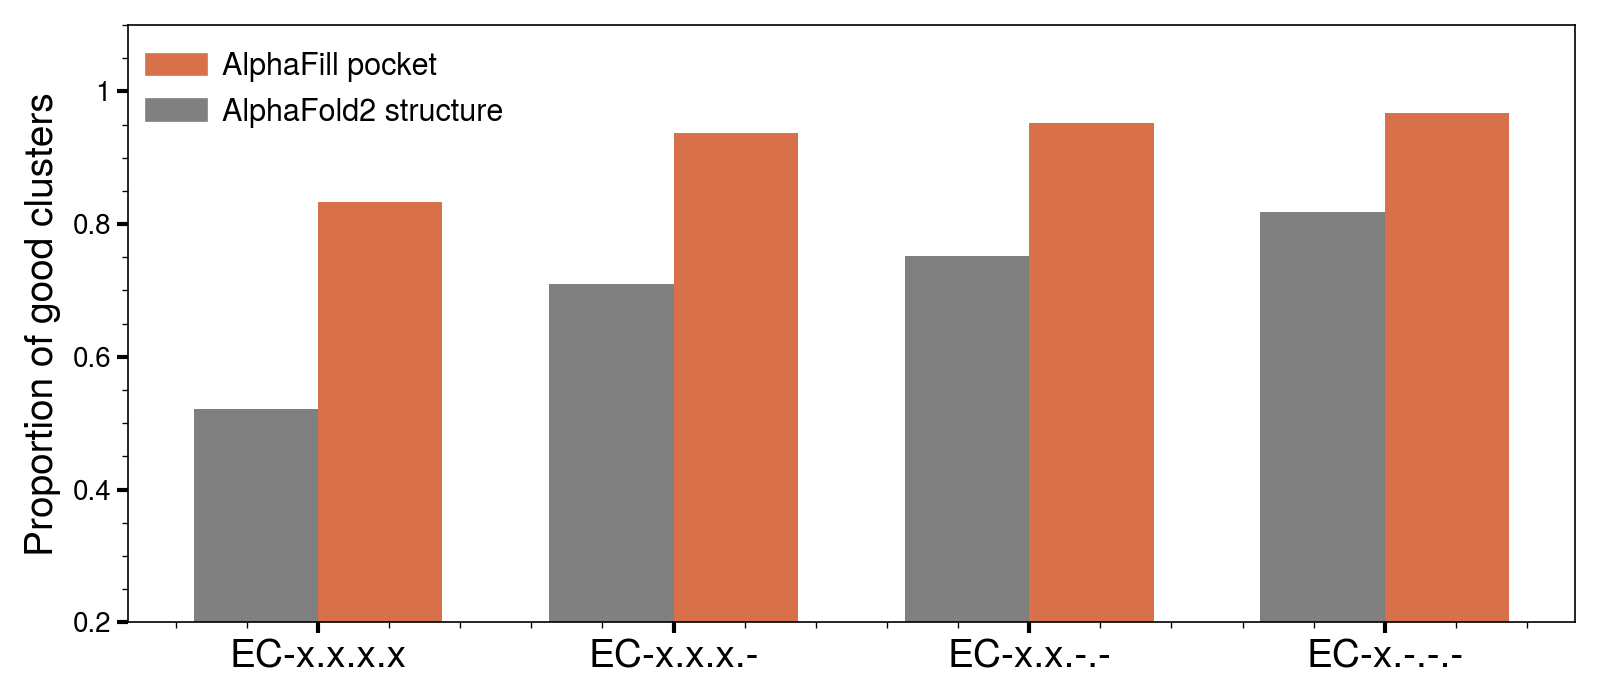

In [51]:
fig, axs = plt.subplots(1, 1, figsize=(8, 3.5), dpi=100, facecolor='white') 
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.tight_layout()
# plt.subplots_adjust(wspace=0.5, hspace=0.5)

y_label_font_size = 14
x_label_font_size = 14

y_number_font_size = 10
titel_font_size = 16
border_width = 1.5

# axs.spines['top'].set_linewidth(border_width)
# axs.spines['right'].set_linewidth(border_width)
# axs.spines['bottom'].set_linewidth(border_width)
# axs.spines['left'].set_linewidth(border_width)
axs.tick_params(axis='both', width=border_width)
# axs.spines['right'].set_visible(False)
# axs.spines['top'].set_visible(False)

k = 0

bar_width = 0.35
bar_gap = 0.0
num_methods = 2
# color_map = {
#     'af2 structure': '#c1cbd7',
#     'alphafill pocket': '#e0e5df',
# }
# c1 = '#c1cbd7'
# c2 = '#d8caaf'

c1 = '#808080'
# c2 = '#B0D9E6'
c2 = method_to_color['EnzymeCAGE']

color_map = {
    # 'af2 structure': {'Medium': '#DEEBF7', 'Good': '#BDD7EE', 'Excellent': darken_color('#9DC3E6', 0.1)},
    'af2 structure': {'Medium': lighten_color(c1, 0.15), 'Good': lighten_color(c1), 'Excellent': c1},
    'alphafill pocket': {'Medium': lighten_color(c2, 0.15), 'Good': lighten_color(c2), 'Excellent': c2},
    #    'af2 structure': {'Medium': c1, 'Good': lighten_color(c1), 'Excellent': lighten_color(c1, 0.15)},
    # 'alphafill pocket': {'Medium': c2, 'Good': lighten_color(c2), 'Excellent': lighten_color(c2, 0.15)},
}
topk_ec_list = [4, 3, 2, 1]
n_ec = 4
for i, method in enumerate(data.keys()):
    pos = np.arange(len(topk_ec_list)) + i * (bar_width + bar_gap)

    bottom_list = [0]*len(topk_ec_list)
    for quality in ['Excellent']:
        val_list = [data[method][ec][quality] for ec in topk_ec_list]
        axs.bar(pos, val_list, bar_width, color=color_map[method][quality], bottom=bottom_list, linewidth=2)
        bottom_list = [b+v for b, v in zip(bottom_list, val_list)]

axs.set_xticks(np.arange(len(topk_ec_list)) + (num_methods - 1) * (bar_width + bar_gap) / 2)
x_label_list = ['EC-x.x.x.x', 'EC-x.x.x.-', 'EC-x.x.-.-', 'EC-x.-.-.-']
axs.set_xticklabels(x_label_list, fontsize=x_label_font_size, fontweight='light')


legend_labels = ['AlphaFill pocket', 'AlphaFold2 structure']
legend_info = [plt.Rectangle((0,0),1,1,color=color) for color in [c2, c1]]

# 添加共享的图例
axs.legend(legend_info, legend_labels, bbox_to_anchor=(0.27, 0.98), ncol=1, fontsize=11, frameon=False)


# y_min = max(data.min() - 10, 0)
# y_max = min(data.max() + 10, 100)
y_min, y_max = 0.2, 1.1
axs.set_ylim(y_min, y_max)
# axs.set_title("Quality analysis of clustering", fontsize=titel_font_size, pad=10, fontweight='bold')
axs.set_ylabel('Proportion of good clusters', fontsize=y_label_font_size, fontweight='light')

axs.grid(False)
axs.tick_params(axis='y', labelsize=y_number_font_size)
# for tick in axs.get_yticklabels():
#     tick.set_fontweight('bold')

plt.tight_layout(pad=1.0)

plt.savefig('./plots/case_study_quality-analysis.png', format='png', dpi=200, bbox_inches='tight')
plt.show()

## External test

In [52]:
def sort_rows(df, column, order):
    df[column] = pd.Categorical(df[column], categories=order, ordered=True)
    df = df.sort_values(column).reset_index(drop=True)
    return df

In [76]:
p450_result_path = 'example_data/external_test/p450_result.csv'
df_p450_result = pd.read_csv(p450_result_path)

In [77]:
terpene_result_path = 'example_data/external_test/terpene_result.csv'
df_terpene_result = pd.read_csv(terpene_result_path)

In [78]:
phosphatase_result_path = 'example_data/external_test/phosphatase_result.csv'
df_pho_result = pd.read_csv(phosphatase_result_path)

In [79]:
df_pho_result = df_pho_result[df_pho_result['Method'] != 'GVP-FP']
df_p450_result = df_p450_result[df_p450_result['Method'] != 'GVP-FP']
df_terpene_result = df_terpene_result[df_terpene_result['Method'] != 'GVP-FP']

In [80]:
old_cols_to_new = {}
for topk in [1, 2, 3, 5]:
    old_cols_to_new[f'Top {topk}.0% SR'] = f'Top {topk}%'
    old_cols_to_new[f'Top {topk}.0% SR std'] = f'Top {topk}% std'

In [81]:
df_p450_result = df_p450_result.rename(columns=old_cols_to_new)
df_terpene_result = df_terpene_result.rename(columns=old_cols_to_new)
df_pho_result = df_pho_result.rename(columns=old_cols_to_new)

In [82]:
methods_order = ['Selenzyme', 'CLIPZyme', 'ESP', 'EnzymeCAGE', 'EnzymeCAGE-ft']
methods_order_pho = ['CLIPZyme', 'ESP', 'EnzymeCAGE', 'EnzymeCAGE-ft']
df_p450_result = sort_rows(df_p450_result, 'Method', methods_order)
df_terpene_result = sort_rows(df_terpene_result, 'Method', methods_order)
df_pho_result = sort_rows(df_pho_result, 'Method', methods_order_pho)

### 柱状图

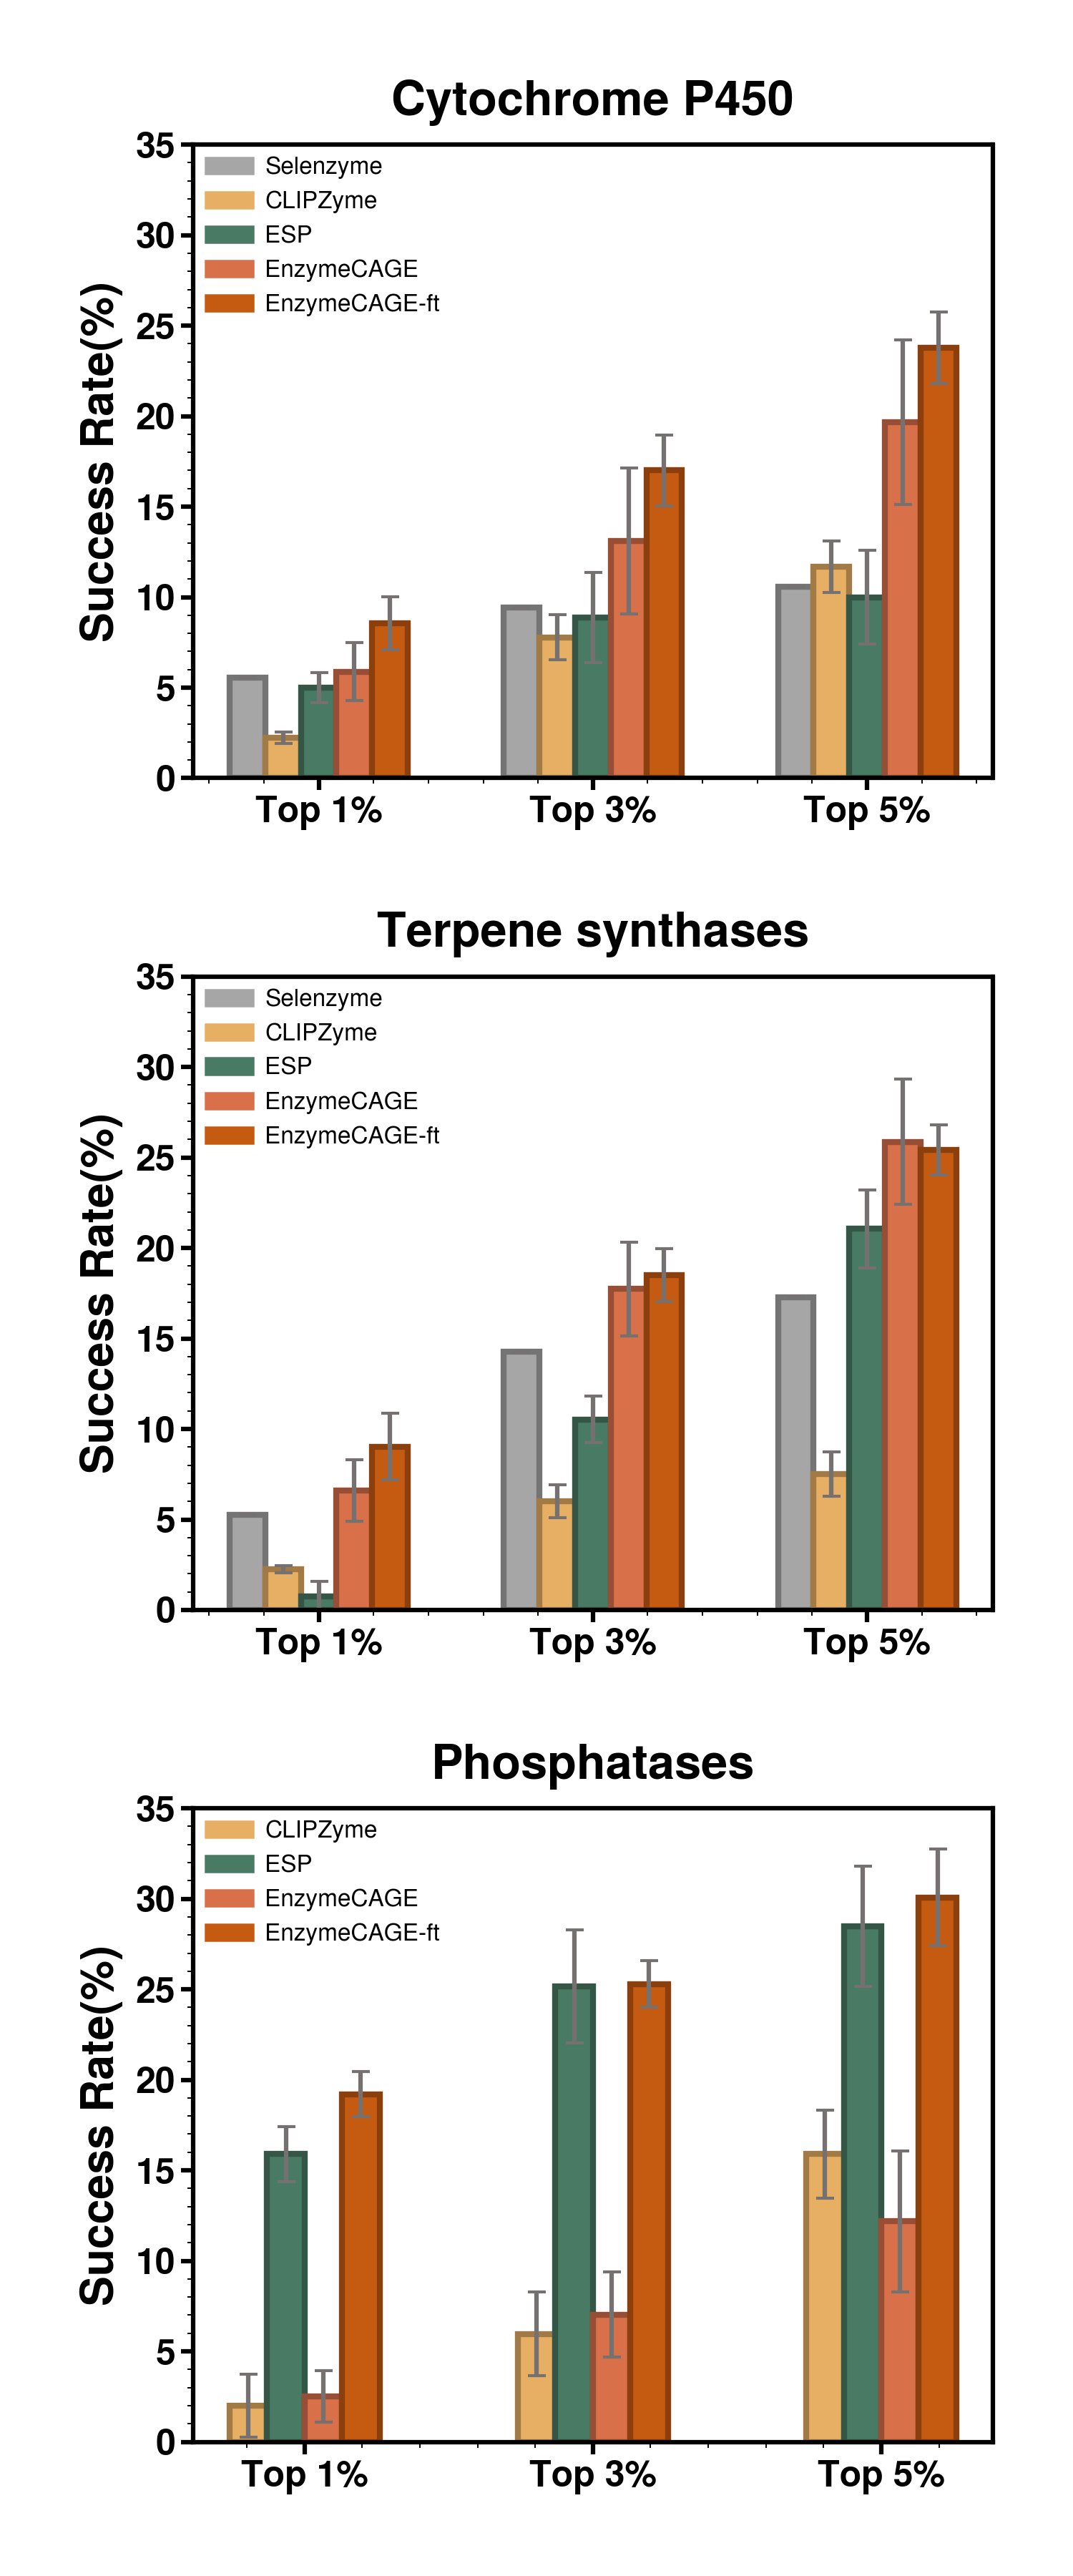

In [84]:
# fig, axs = plt.subplots(2, 1, figsize=(12, 5), gridspec_kw={'width_ratios': [1,1]}, dpi=100, facecolor='white') 
fig, axs = plt.subplots(3, 1, figsize=(5, 12), dpi=150, facecolor='white')
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

y_label_font_size = 15
x_label_font_size = 12

y_number_font_size = 12
titel_font_size = 16
border_width = 1.5
for ax in axs:
    ax.spines['top'].set_linewidth(border_width)
    ax.spines['right'].set_linewidth(border_width)
    ax.spines['bottom'].set_linewidth(border_width)
    ax.spines['left'].set_linewidth(border_width)
    ax.tick_params(axis='both', width=border_width)

k = 0

testset_list = ['Cytochrome P450', 'Terpene synthases', 'Phosphatases']
data_dict = {
    'Cytochrome P450': df_p450_result,
    'Terpene synthases': df_terpene_result,
    'Phosphatases': df_pho_result
}

for dataset, df_sr_result in data_dict.items():
    metrics = ['Top 1%', 'Top 3%', 'Top 5%']
    stds = [col + ' std' for col in metrics]
    methods = df_sr_result['Method'].values
    # data = df_sr_result[df_sr_result['Max Similarity'] == 0.5].values[:, :-1] *100
    data = df_sr_result[metrics].values * 100
    std = df_sr_result[stds].values * 100
    
    bar_width = 0.13
    bar_gap = 0.0
    num_methods = len(methods)
    for i in range(num_methods):
        method = methods[i]
        c = method_to_color[method]
        cb = darken_color(c)
        colors = [c] * len(metrics)
        border_colors = [cb] * len(metrics)
        pos = np.arange(len(metrics)) + i * (bar_width + bar_gap)
        axs[k].bar(pos, data[i, :], bar_width, yerr=std[i, :], color=colors, ecolor=errbar_color, edgecolor=border_colors, linewidth=2)
        # print(pos, data[:, i])
        
    axs[k].set_xticks(np.arange(len(metrics)) + (num_methods - 1) * (bar_width + bar_gap) / 2)
    axs[k].set_xticklabels(metrics, fontsize=x_label_font_size, fontweight='bold')

    # y_min = max(data.min() - 10, 0)
    # y_max = min(data.max() + 10, 100)
    if dataset == 'Cytochrome P450':
        y_min, y_max = 0, 35
    elif dataset == 'Terpene synthase':
        y_min, y_max = 0, 35
    elif dataset == 'Phosphatase':
        y_min, y_max = 0, 35
        
    axs[k].set_ylim(y_min, y_max)
    axs[k].set_title(f"{dataset}", fontsize=titel_font_size, pad=10, fontweight='bold')
    # if k == 0:
    axs[k].set_ylabel('Success Rate(%)', fontsize=y_label_font_size, fontweight='bold')
    # if k == 1:
    #     axs[k].set_xlabel('Max reaction similarity to train set', fontsize=y_label_font_size, fontweight='bold')
    axs[k].grid(False)
    axs[k].tick_params(axis='y', labelsize=y_number_font_size)
    for tick in axs[k].get_yticklabels():
        tick.set_fontweight('bold')

    legend_info = [plt.Rectangle((0,0),1,1,color=method_to_color[method]) for method in methods]
    legend_labels = methods
    
    # # 添加共享的图例
    axs[k].legend(legend_info, legend_labels, loc='upper left', ncol=1, fontsize=8, frameon=False)

    k += 1

# plt.tight_layout()
plt.tight_layout(pad=3.0)

# plt.savefig('./plots/external_test.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

## Ablation

In [92]:
ablation_color_map = {
    'EnzymeCAGE': '#D8704A', 
    'w/o reaction\ngeo-guidance': '#E7AF63', 
    'w/o pocket\ngeo-guidance': '#E7AF63', 
    'only esm+drfp': '#98BD92',
    'w/o esm': '#497B64',
    'w/o drfp': '#A6A6A6',
}

In [93]:
old2new = {
    'EnzymeCAGE': 'EnzymeCAGE',
    'no-geo-rxn': 'w/o reaction\ngeo-guidance',
    'no-geo-pocket': 'w/o pocket\ngeo-guidance',
    'only-esm-drfp': 'only esm+drfp',
    'no-esm': 'w/o esm',
    'no-drfp': 'w/o drfp'
}

In [85]:
result_path = 'example_data/new-enzymes/ablation_result.csv'

In [86]:
df_ablation = pd.read_csv(result_path)

In [87]:
df_ablation = df_ablation.rename(columns={'EF': 'EF(0.01)', 'EF_Std': 'EF(0.01)_Std'})

In [88]:
metric = 'EF(0.01)'

In [89]:
df_ablation = df_ablation.sort_values(metric, ascending=False)

In [94]:
df_ablation['Name'] = df_ablation['Method'].map(old2new)

In [95]:
df_ablation

,Method,AUC,AUC_Std,EF(0.01),EF(0.01)_Std,DCG,DCG_Std,Name
0,EnzymeCAGE,0.776385,0.001747,35.930779,0.671127,1.076252,0.016663,EnzymeCAGE
1,no-geo-pocket,0.767774,0.006843,34.620948,0.808592,1.034915,0.015012,w/o pocket\ngeo-guidance
5,no-geo-rxn,0.769643,0.002829,34.149122,0.402137,1.013543,0.012389,w/o reaction\ngeo-guidance
3,no-esm,0.763584,0.003432,33.558593,0.921876,1.020439,0.014493,w/o esm
2,no-drfp,0.740756,0.005159,31.601872,2.142347,0.966943,0.029414,w/o drfp
4,only-esm-drfp,0.767185,0.003096,31.555029,0.628077,0.992215,0.004940,only esm+drfp


### 散点图

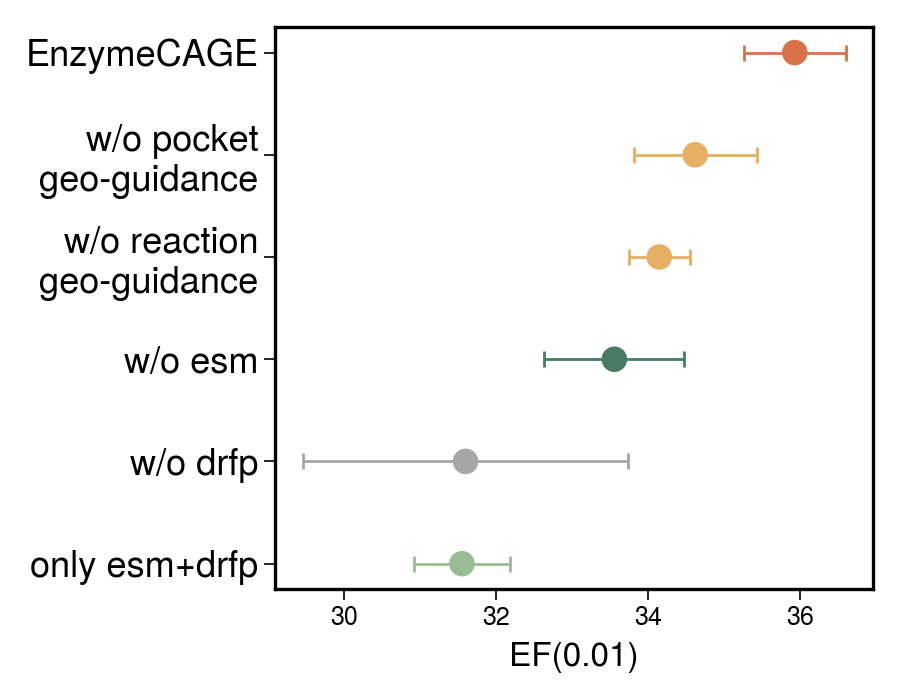

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = df_ablation

# 绘制横向散点图
plt.figure(figsize=(4.5, 3.5), facecolor='white')
plt.grid(False)
sns.scatterplot(
    x=metric, 
    y="Name", 
    data=data, 
    hue="Name",
    palette=ablation_color_map,
    s=100,  # 点的大小
    legend=False  # 禁用图例
)

# 添加误差线（逐点设置颜色）
for i, row in data.iterrows():
    plt.errorbar(
        x=[row[metric]], 
        y=[row["Name"]], 
        xerr=[row[metric + "_Std"]], 
        fmt="none",  # 不画额外的点
        ecolor=ablation_color_map[row["Name"]],  # 使用对应颜色
        capsize=3, 
        linewidth=1
    )

border_width = 1.2
ax = plt.gca()  # 获取当前轴
ax.spines['top'].set_linewidth(border_width)  # 设置上边框粗细为2
ax.spines['right'].set_linewidth(border_width)  # 设置右边框粗细为2
ax.spines['left'].set_linewidth(border_width)  # 设置左边框粗细为2
ax.spines['bottom'].set_linewidth(border_width)  # 设置下边框粗细为2

# 添加标题和轴标签
# plt.title("Ablation Results", fontsize=14, fontweight="bold")
plt.xlabel(metric, fontsize=12)
plt.tick_params(axis='y', labelsize=13) 
plt.ylabel("", fontsize=12)
plt.gca().set_facecolor('white')
plt.gca().yaxis.set_tick_params(which="minor", length=0)
plt.gca().xaxis.set_tick_params(which="minor", length=0)
plt.tight_layout()
# plt.savefig('./plots/ablation.png', format='png', dpi=200, bbox_inches='tight')
plt.show()
